<div class="alert alert-success" role="alert">
<h1>ADVANCED REGRESSION ASSIGNMENT</h1>

<h2>Submitted by: Sumit Roy</h2>
</div>

# Flow of this notebook

### 1) Read and Understand the data

### 2) Data Exploration

- Univariate Analysis
- Bivariate Analysis

### 3) Feature Engineering

### 4) Data Preprocessing

- Missing Value Treatment
- Dummy Variable Creation
- Outlier Treatment

### 5) Model Building, Tuning & Evaluation

- Split the Data into Dependent and Independent variables
- Train - Test Split
- Scaling numerical columns

- Model 1: Ridge Regression

- Model 2: Lasso


### 6) Comparing the two models

### 7) Inferences for 'Surprise Housing' 

### 8) Coding for answering the subjective questions

## Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
from itables import show

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Reading Data

In [2]:
path = "train.csv"

def load(path, info = True):
    
    import pandas as pd
    import io
    
    if len(path.split(".csv")) > 1:
        read = pd.read_csv(path, keep_default_na=False)
    elif len(path.split(".xlsx")) > 1:
        read = pd.read_excel(path)
    
    if info:
        if len(read) > 0:
            print("# Data imported!")
            print("# ------------------------------------", "\n")
        
            print("# DIMENSIONS -------------------------")
            print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")
    
            print("# DTYPES -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("object").columns), "\n", 
                      read.select_dtypes("object").columns.tolist(), "\n")
    
            if len(read.select_dtypes("integer").columns) > 0:
                print("Integer Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("integer").columns), "\n", 
                      read.select_dtypes("integer").columns.tolist(), "\n")
    
            if len(read.select_dtypes("float").columns) > 0:
                print("Float Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("float").columns), "\n", 
                      read.select_dtypes("float").columns.tolist(), "\n")
    
            if len(read.select_dtypes("bool").columns) > 0:
                print("Bool Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("bool").columns), "\n", 
                      read.select_dtypes("bool").columns.tolist(), "\n")
    
            print("# MISSING VALUE ---------------------")
            print("Are there any missing values? \n ", np.where(read.isnull().values.any() == False, 
                                                            "No missing value!", "Data includes missing value!"), "\n")
            
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# MEMORY USAGE ---------------------- \n", info)
          
        else:
            print("# Data did not import!")
    
    return read
    
df = load(path, info = True)
df.head()

# Data imported!
# ------------------------------------ 

# DIMENSIONS -------------------------
Observation: 1460 Column: 81 

# DTYPES -----------------------------
Object Variables: 
 # of Variables: 46 
 ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Integer Variables: 
 # of Variables: 35 
 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'Bsmt

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Data Description

Following is the explanation of all the variables/features:-

**MSSubClass**: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
**LotFrontage**: Linear feet of street connected to property

**LotArea**: Lot size in square feet

**Street**: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
**Alley**: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
**LotShape**: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
**LandContour**: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
**Utilities**: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
**LotConfig**: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
**LandSlope**: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
**Neighborhood**: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
**Condition1**: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
**Condition2**: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
**BldgType**: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
**HouseStyle**: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
**OverallQual**: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
**YearBuilt**: Original construction date

**YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions)

**RoofStyle**: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
**RoofMatl**: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
**Exterior1st**: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
**Exterior2nd**: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
**MasVnrType**: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
**MasVnrArea**: Masonry veneer area in square feet

**ExterQual**: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
**ExterCond**: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
**Foundation**: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
**BsmtQual**: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
**BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
**BsmtExposure**: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
**BsmtFinType1**: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
**BsmtFinSF1**: Type 1 finished square feet

**BsmtFinType2**: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

**BsmtFinSF2**: Type 2 finished square feet

**BsmtUnfSF**: Unfinished square feet of basement area

**TotalBsmtSF**: Total square feet of basement area

**Heating**: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
**HeatingQC**: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
**CentralAir**: Central air conditioning

       N	No
       Y	Yes
		
**Electrical**: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
**1stFlrSF**: First Floor square feet
 
**2ndFlrSF**: Second floor square feet

**LowQualFinSF**: Low quality finished square feet (all floors)

**GrLivArea**: Above grade (ground) living area square feet

**BsmtFullBath**: Basement full bathrooms

**BsmtHalfBath**: Basement half bathrooms

**FullBath**: Full bathrooms above grade

**HalfBath**: Half baths above grade

**Bedroom**: Bedrooms above grade (does NOT include basement bedrooms)

**Kitchen**: Kitchens above grade

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

**Functional**: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
**Fireplaces**: Number of fireplaces

**FireplaceQu**: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
**GarageType**: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
**GarageYrBlt**: Year garage was built
		
**GarageFinish**: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet

**GarageQual**: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
**GarageCond**: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
**PavedDrive**: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
**WoodDeckSF**: Wood deck area in square feet

**OpenPorchSF**: Open porch area in square feet

**EnclosedPorch**: Enclosed porch area in square feet

**3SsnPorch**: Three season porch area in square feet

**ScreenPorch**: Screen porch area in square feet

**PoolArea**: Pool area in square feet

**PoolQC**: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
**Fence**: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
**MiscFeature**: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
**MiscVal**: $Value of miscellaneous feature

**MoSold**: Month Sold (MM)

**YrSold**: Year Sold (YYYY)

**SaleType**: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
**SaleCondition**: Condition of sale

       Normal	Normal Sale
       Abnormal	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


### The following categorical columns have one level `NA`, which might be erroneously considered as missing value by pandas:-


- `Alley` :  NA =  No alley access
- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2` : NA = No Basement
- `FireplaceQu` : NA = No Fireplace
- `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` : NA = No Garage
- `PoolQC` : NA = No Pool
- `Fence` : NA = No Fence
- `MiscFeature` : NA = None


Hence, we will have to replace these by 'None' before finding missing values.


For this we have read the csv file and set the parameter `keep_default_na` to False

In [3]:
## Replacing all 'NA' of all above mentioned columns by 'None'
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
## Check the info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

### Looking at the data types of all columns and comparing them with the data description of each columns, we deduce that the types of following columns have to be changed:

- Columns `MSSubClass`, `OverallQual`, `OverallCond` need to be converted to **object** type
- Column `LotFrontage` and `MasVnrArea` needs to be converted to **numeric** type. 

In [5]:
## Convert three columns to 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [6]:
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [7]:
## Check whether the data types of five columns have changed
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [8]:
## View the statistical description of the numerical columns
df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452  ...   
std     181.066207   456.098091   161.319273   441.866955   438.705324  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       0.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 34 columns]

### The mean of few variables like `2ndFlrSF` are very different from their median values, so they have skewed distributions.

In [9]:
## Check for missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### There are only two columns containing missing values : `LotFrontage` and `MasVnrArea`,  and we will perform missing value treatment on them.

## Data Exploration

### Univariate Analysis

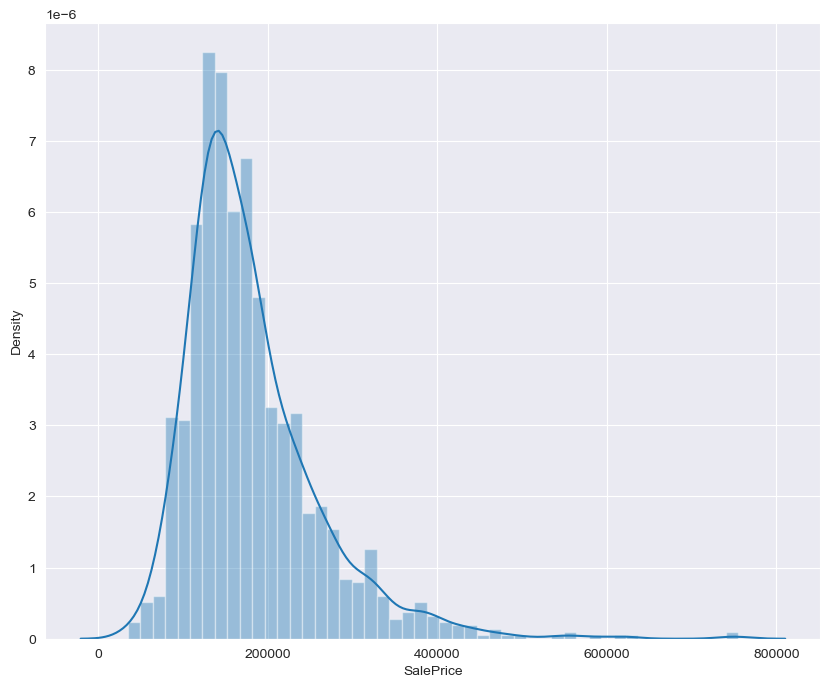

In [10]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

#### The target variable is right-skewed

In [11]:
## Check the skewness of target variable
df['SalePrice'].skew()

1.8828757597682129

#### The skewness is greater than 1, so the target variable is highly skewed

In [12]:
## Check the kurtosis of target variable
df['SalePrice'].kurt()

6.536281860064529

### The kurtosis is greater than 1, so the distribution of target variable is highly peaked
### So, we will log transform our target variable

In [13]:
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])

In [14]:
## Check the skewness of target variable again
df['SalePrice'].skew()

0.12133506220520406

In [15]:
## Check the kurtosis of target variable again
df['SalePrice'].kurt()

0.8095319958036296

#### Both skewness and kurtosis are less than 1 now

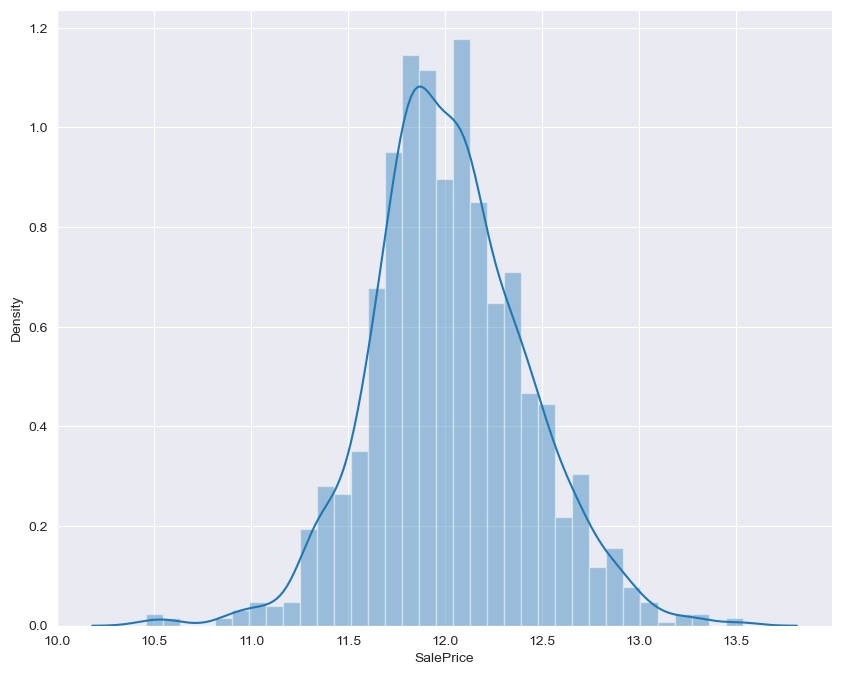

In [16]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

#### So, our target variable has normal distribution now

In [17]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  OpenPorchSF  \
0           0        150          856  ...           0           61   
1           0        284         1262  ...         298            0   
2           0        434          920  ...           0           42   
3           0        540          756  ...           0           35   
4           0        490         1145  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0  12.247694  
1  12.109011  
2  12.317167  
3  11.849398  
4  12.429216  

[5 rows x 34 columns]

In [18]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageYrBlt GarageFinish GarageQual GarageCond  \
0       Gtl      CollgCr  ...        2003          RFn         TA         TA   
1       Gtl      Veenker  ...        1976          RFn         TA         TA   
2       Gtl      CollgCr  ...        2001          RFn         TA         TA   
3       Gtl      Crawfor  ...        1998          Unf         TA         TA   
4       Gtl      NoRidge  ...        2000          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y   None  None        None       WD        Normal  
1          Y   None  None        None       WD        Normal  
2          Y   None  None        None       WD        Normal  
3          Y   None  None        None       WD       Abnorml  
4          Y   None  None        None       WD        Normal  

[5 rows x 47 columns]

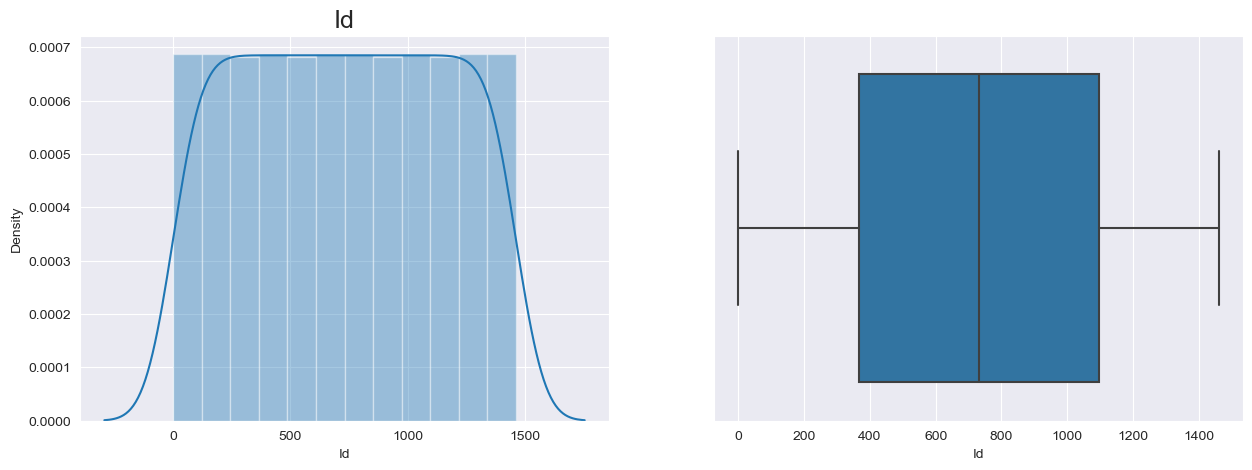

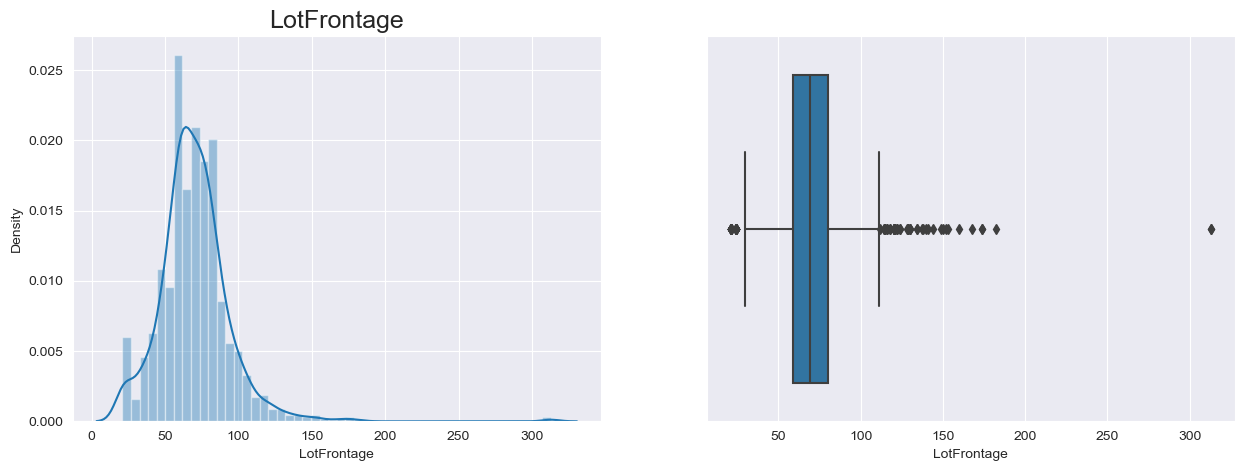

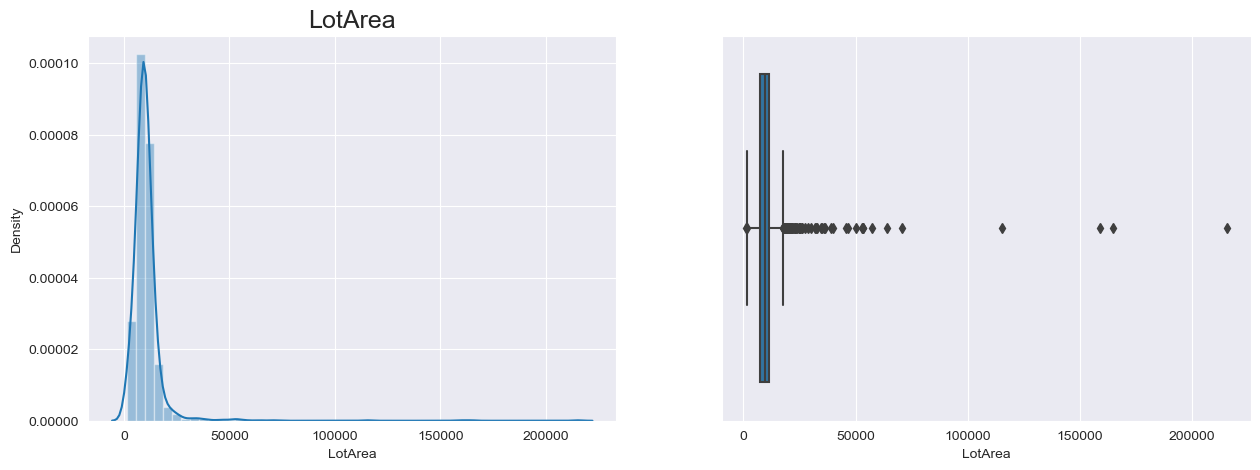

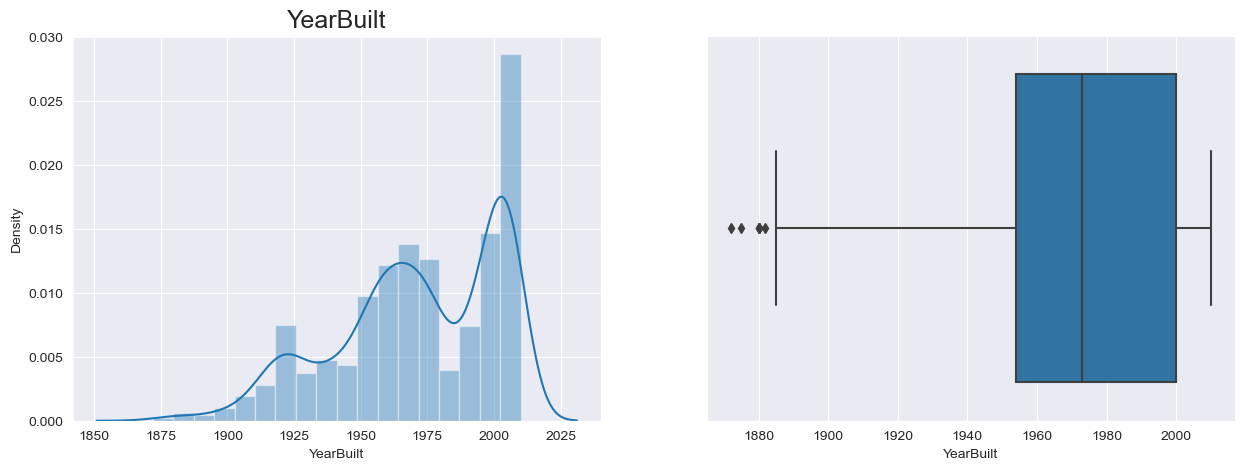

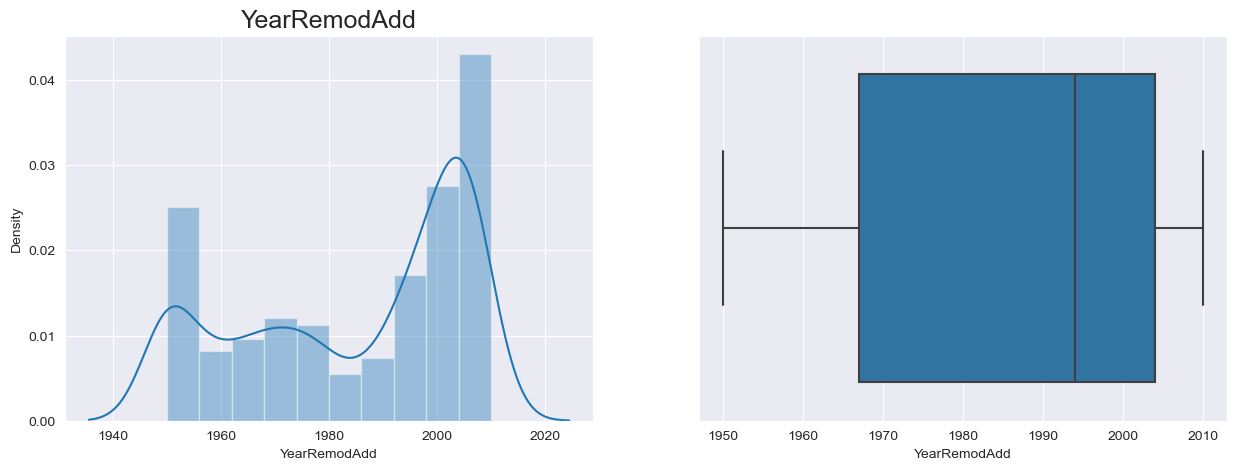

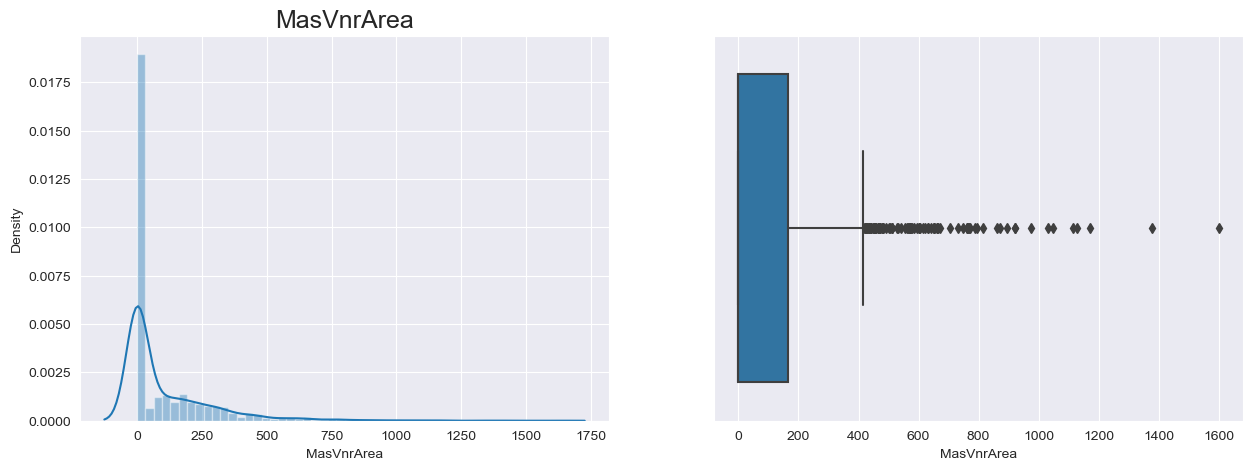

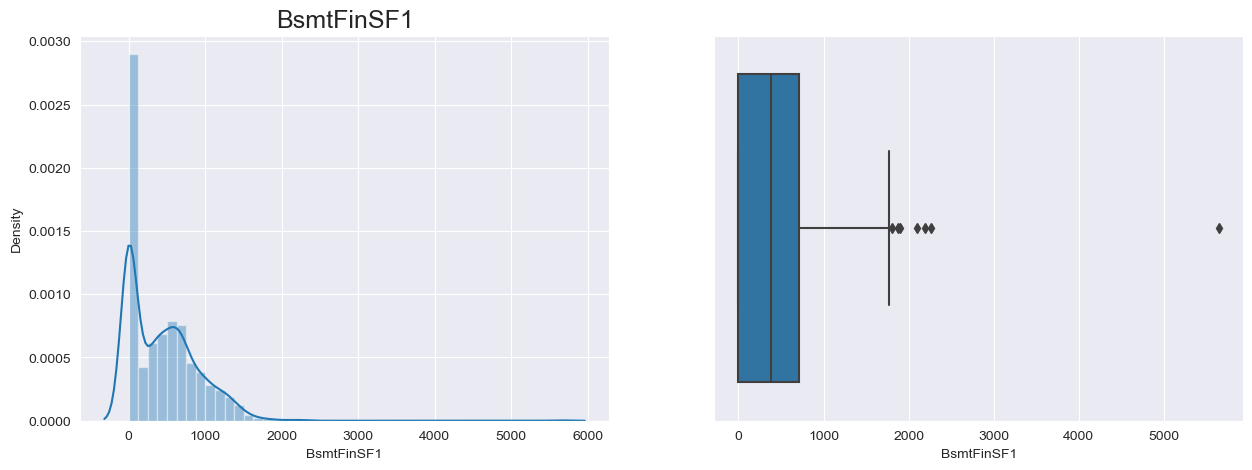

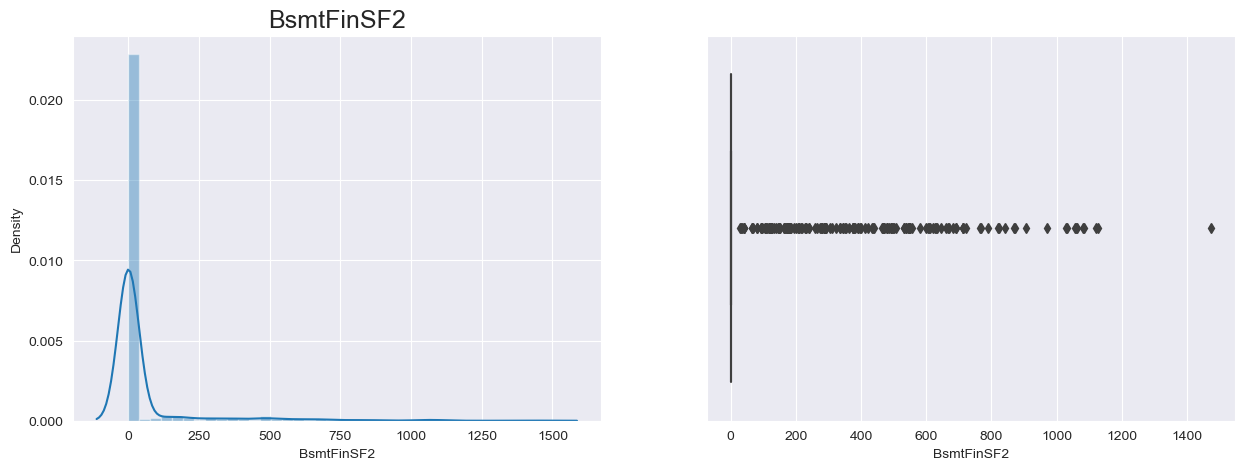

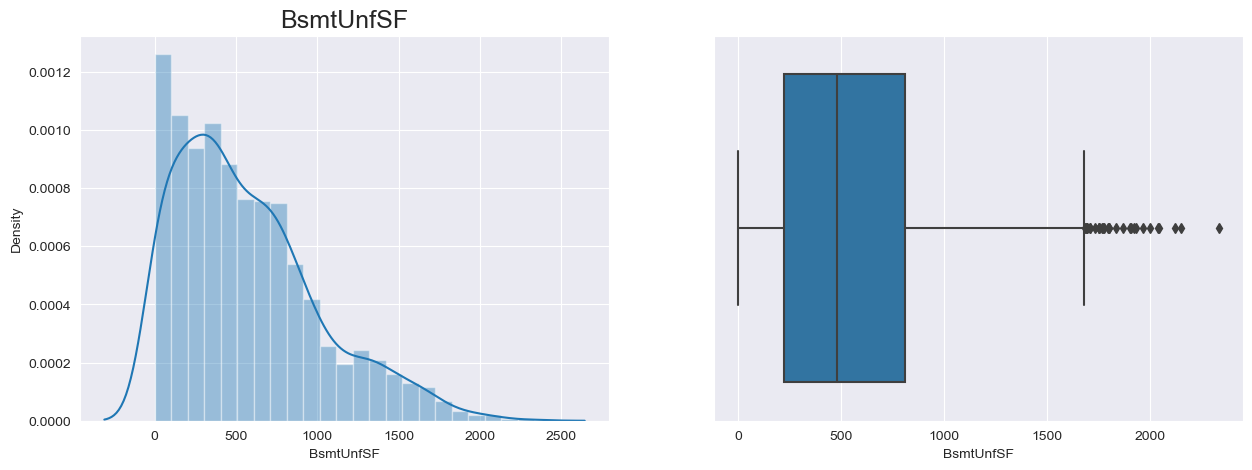

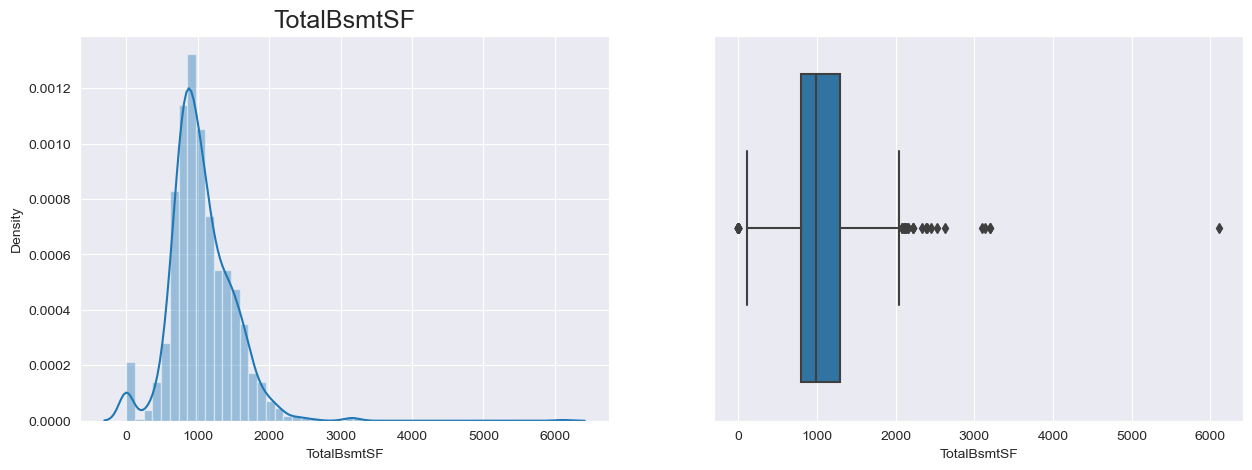

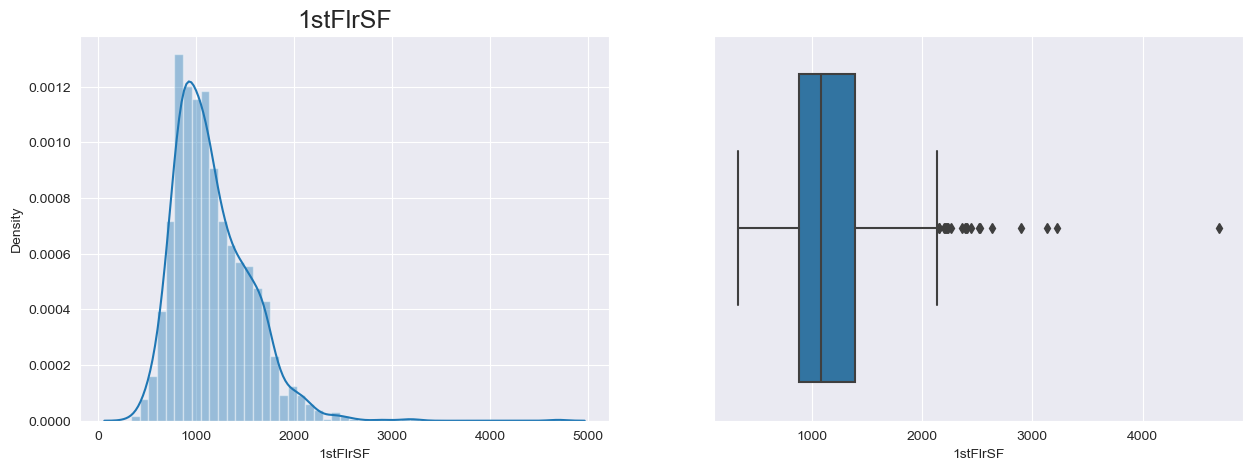

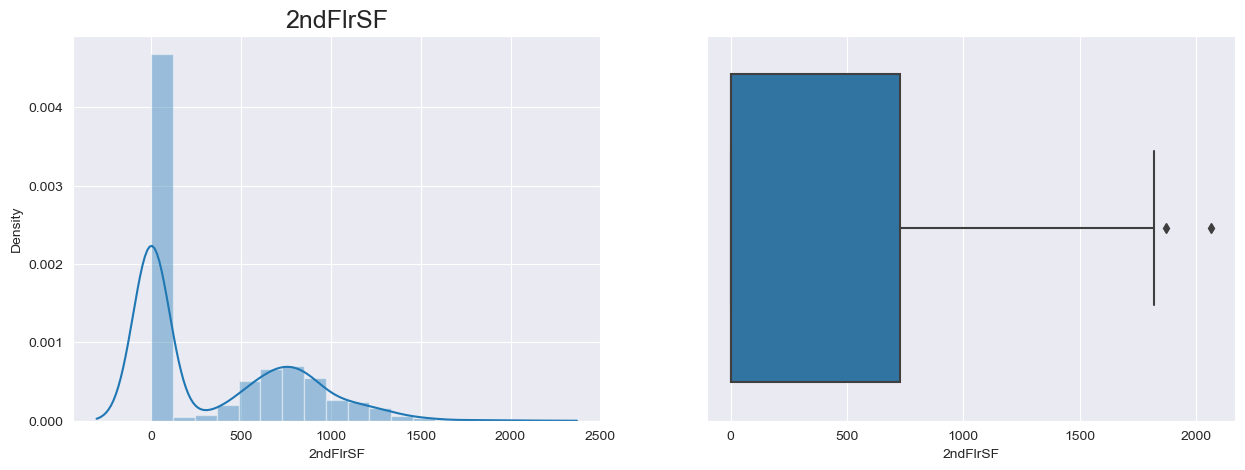

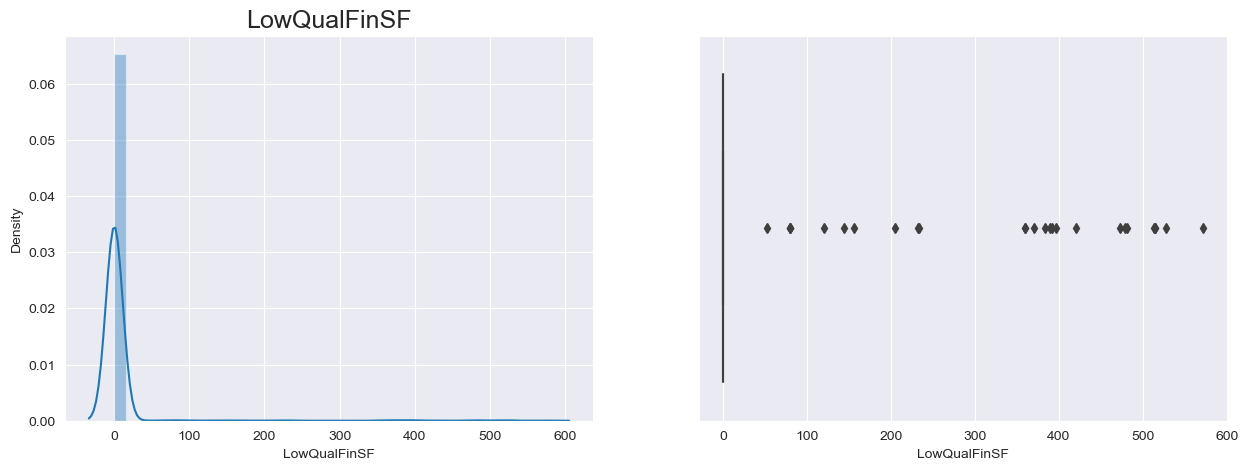

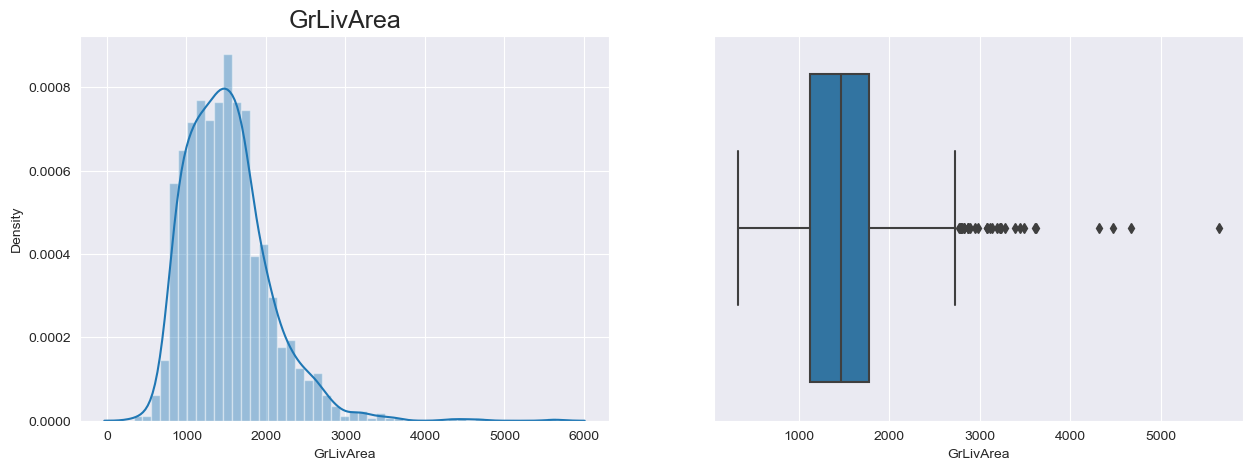

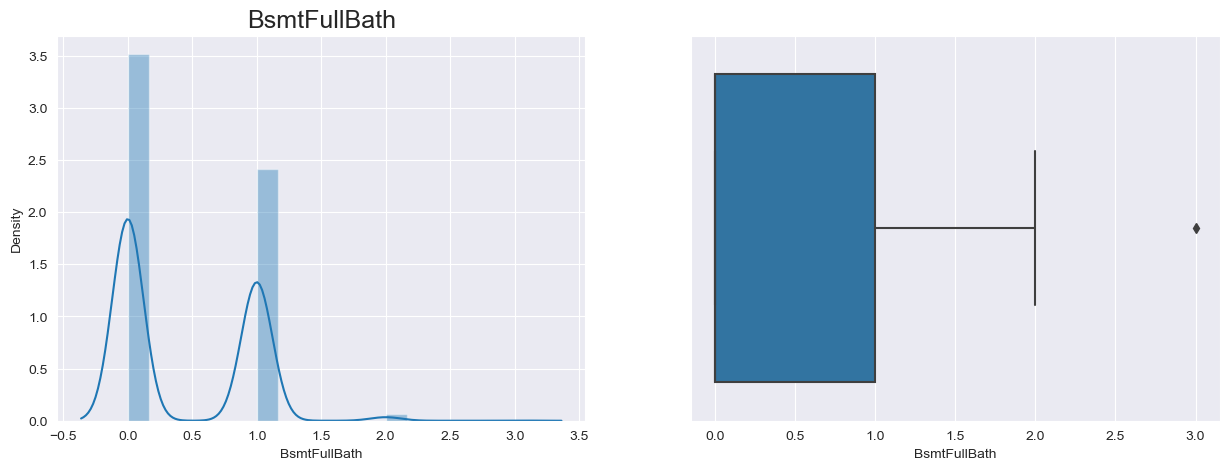

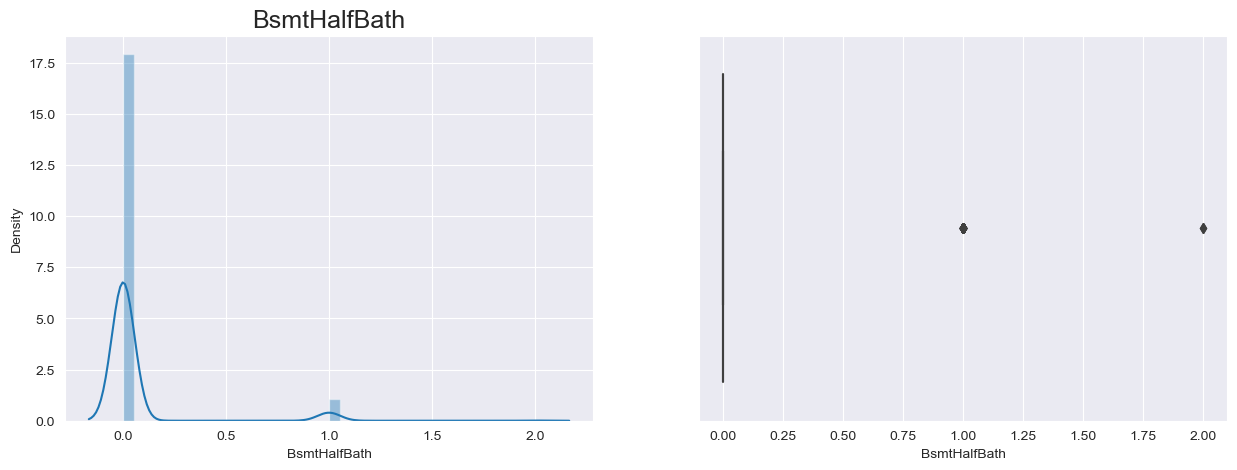

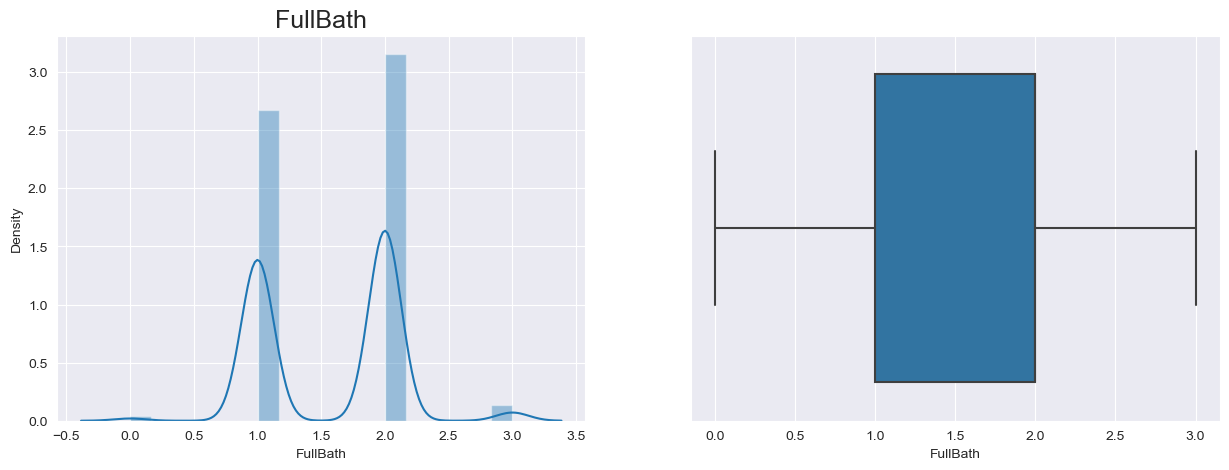

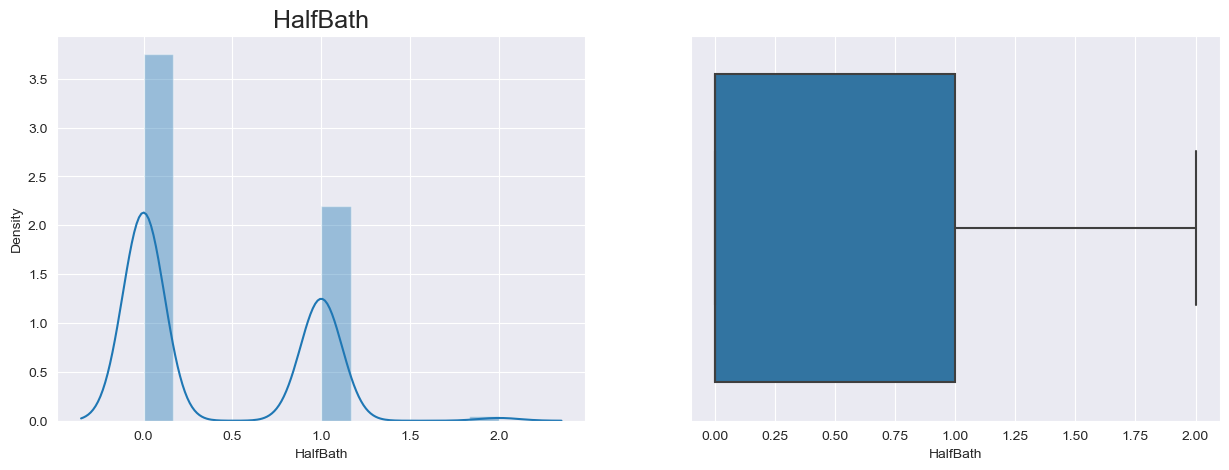

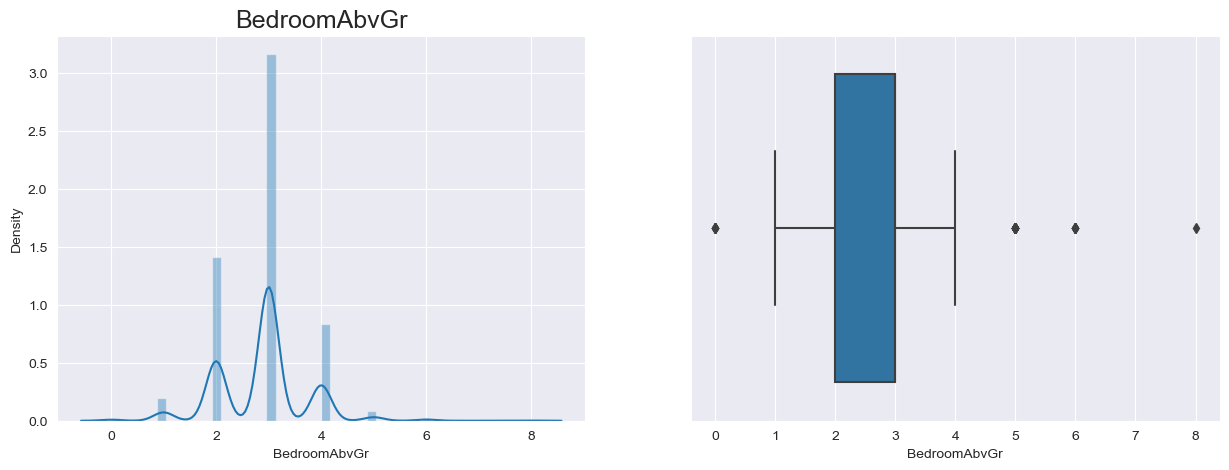

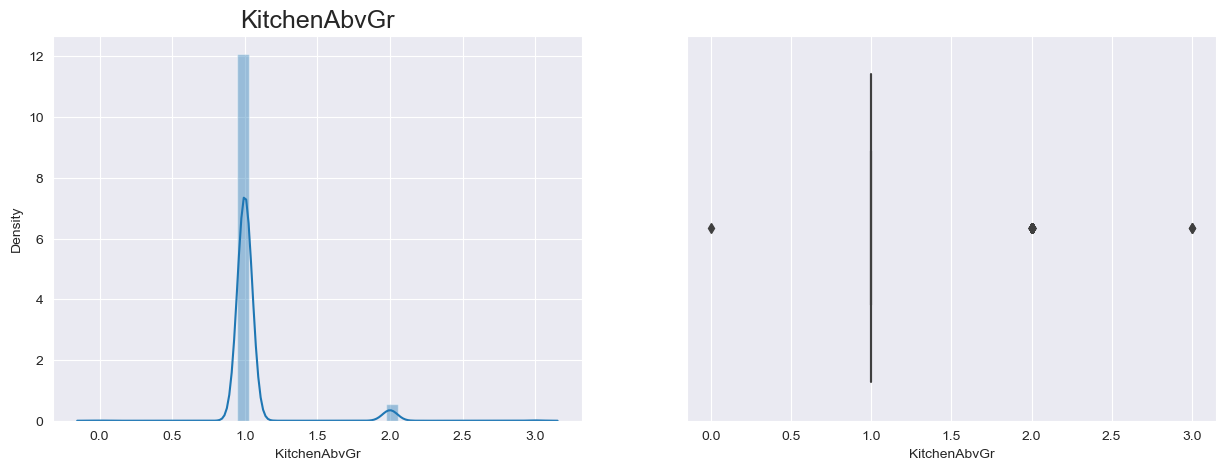

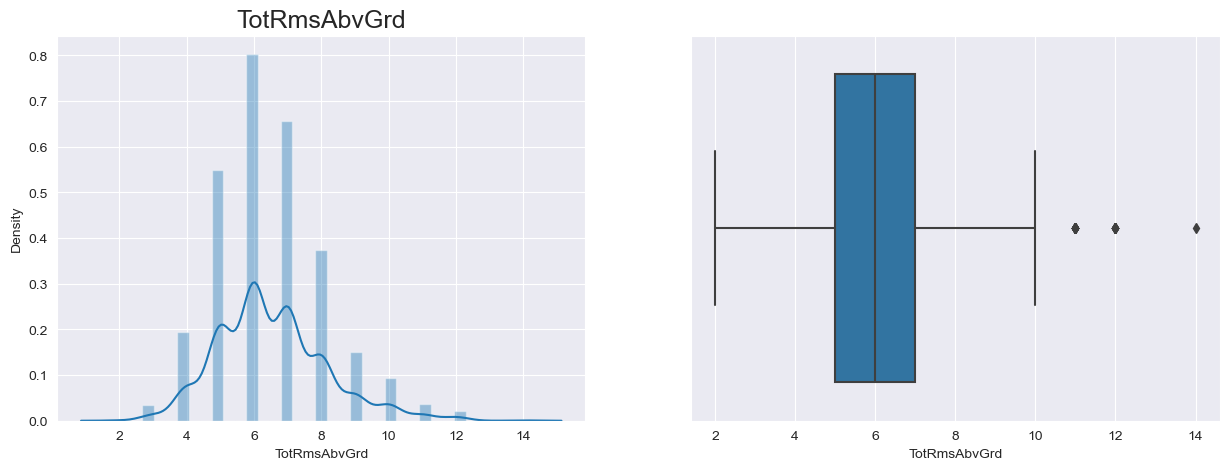

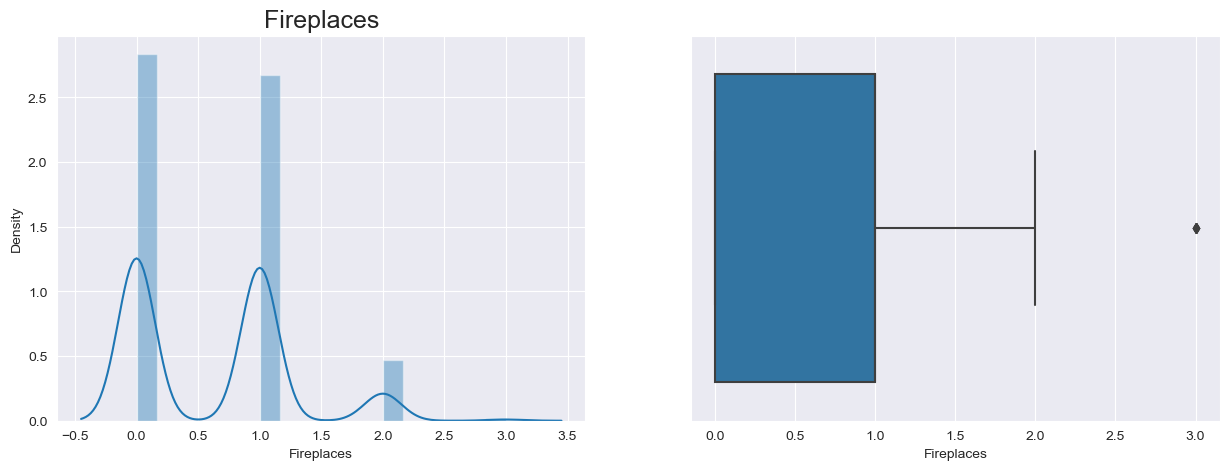

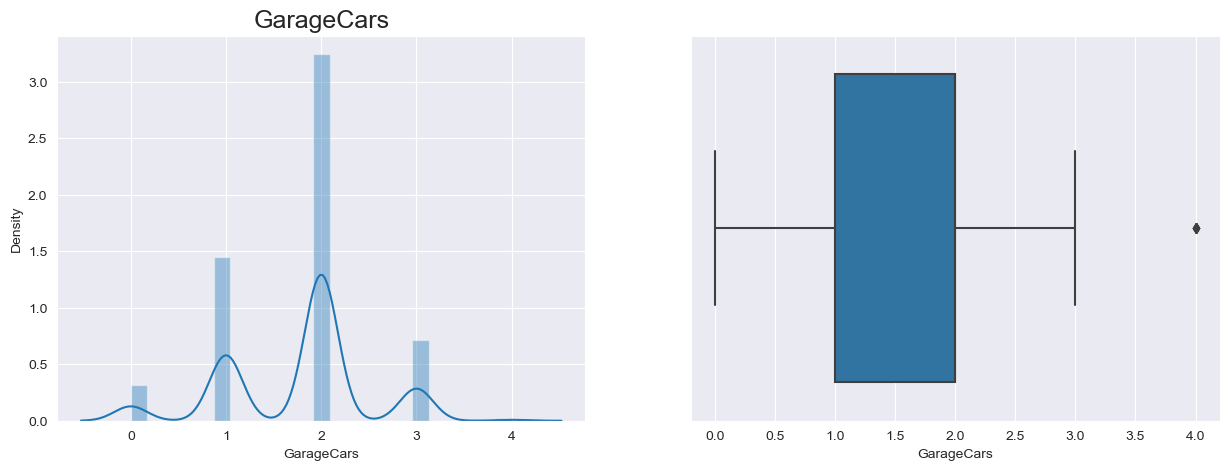

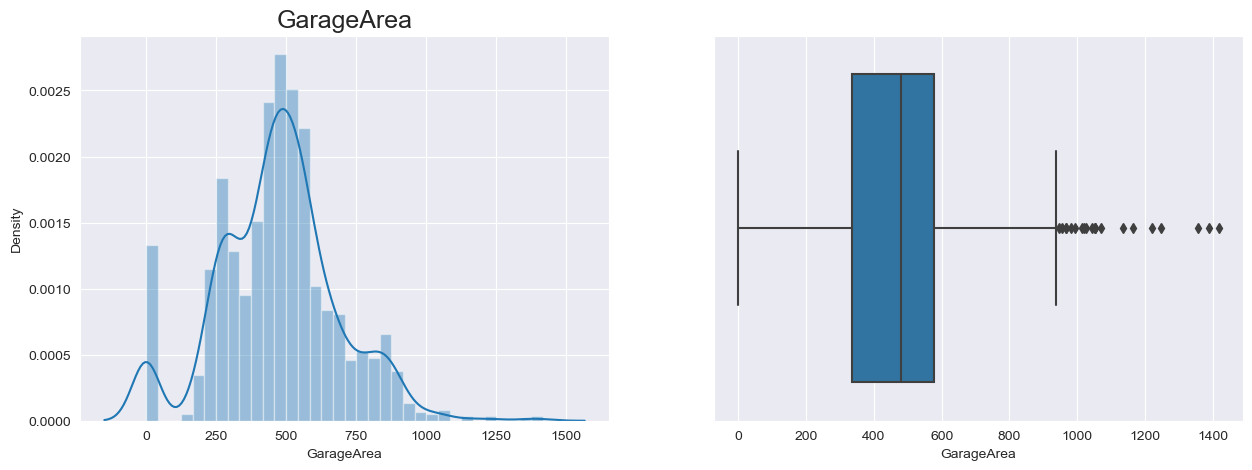

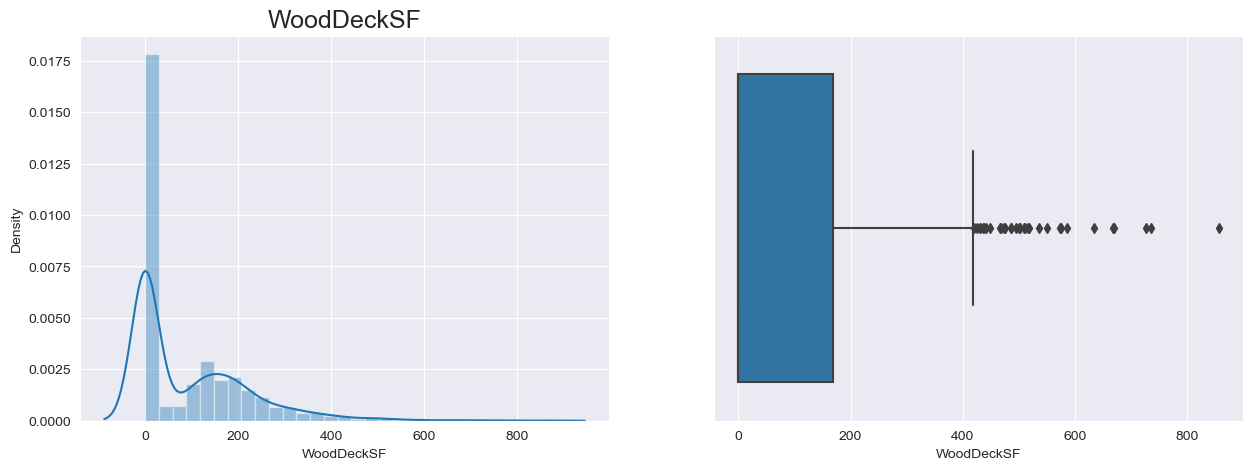

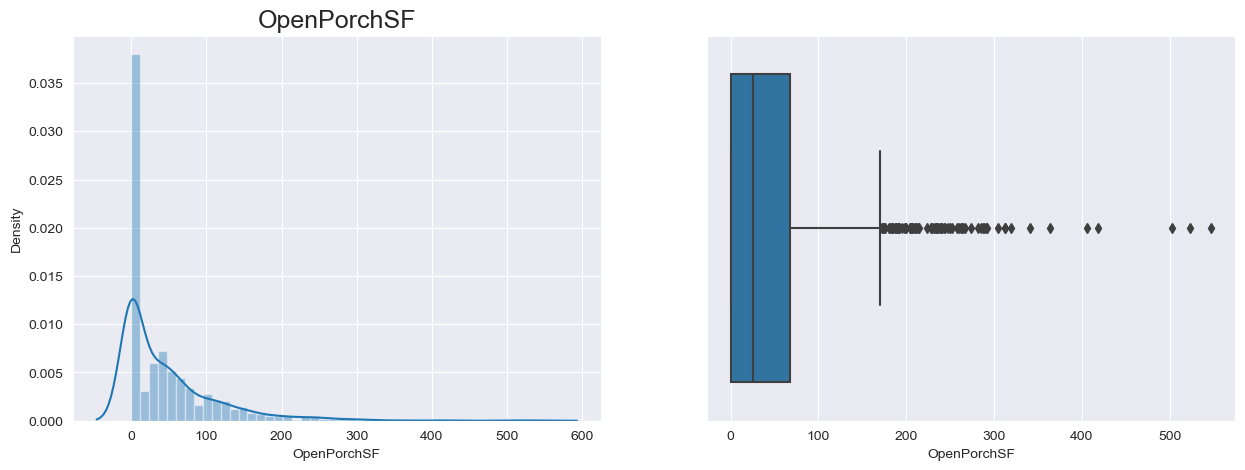

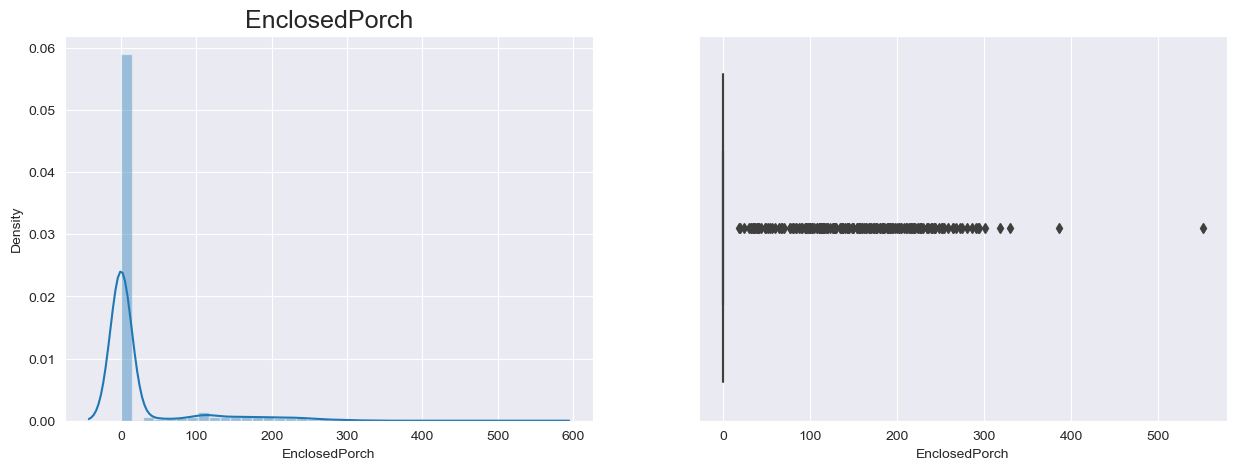

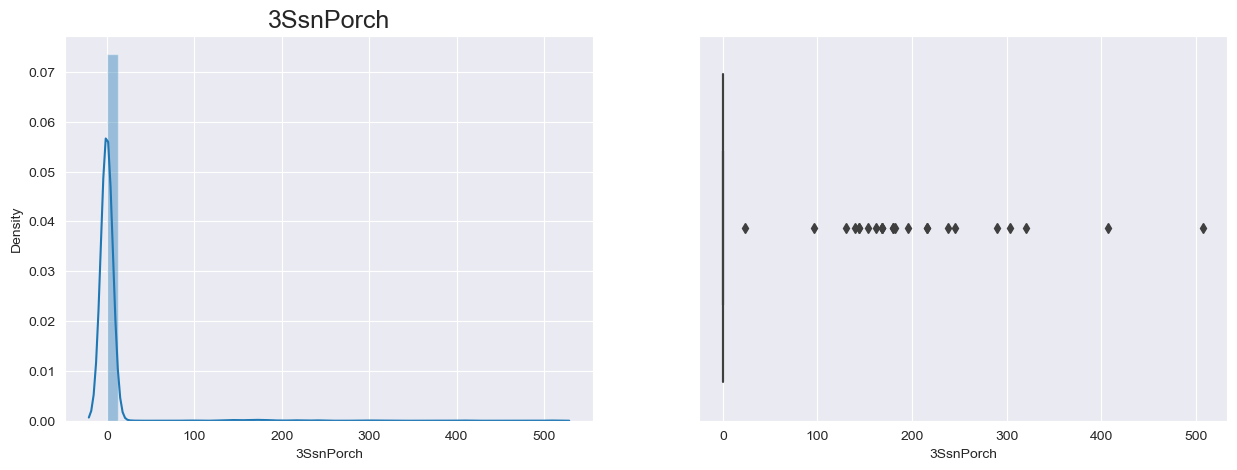

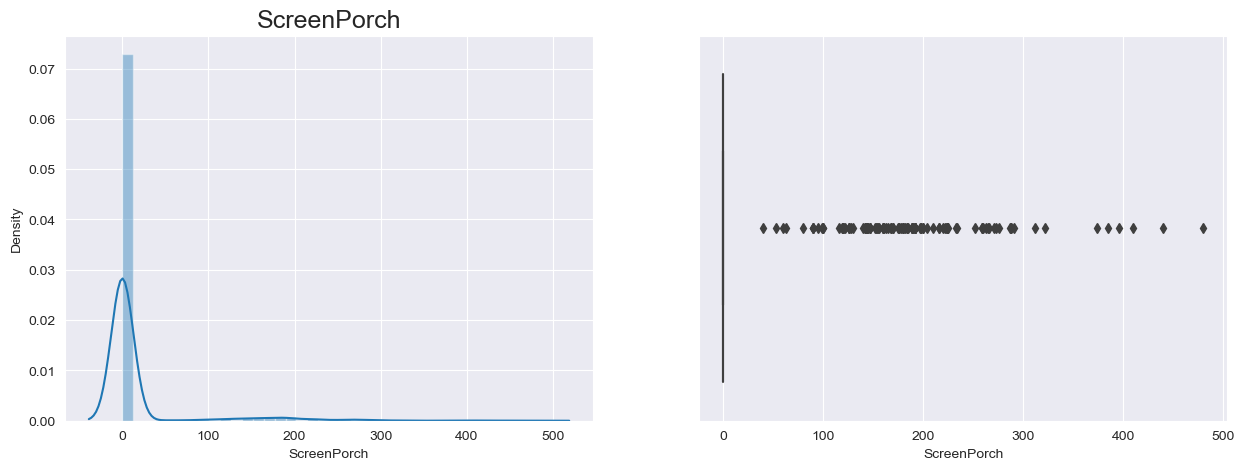

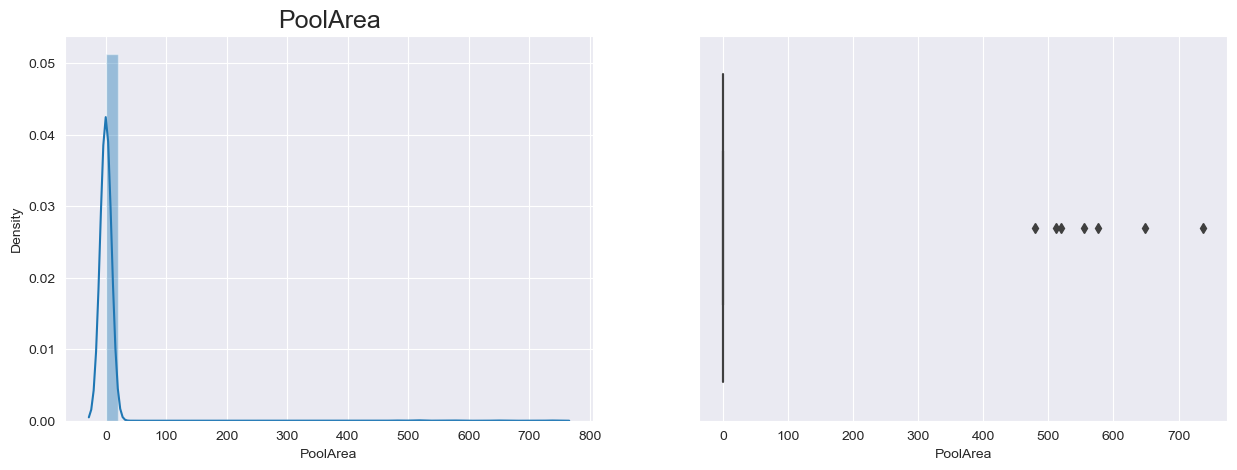

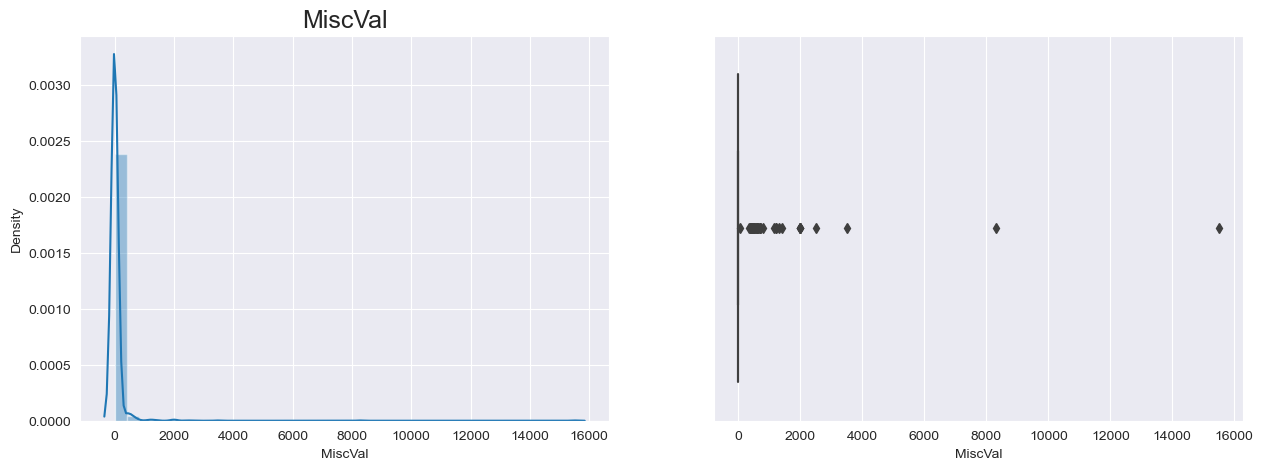

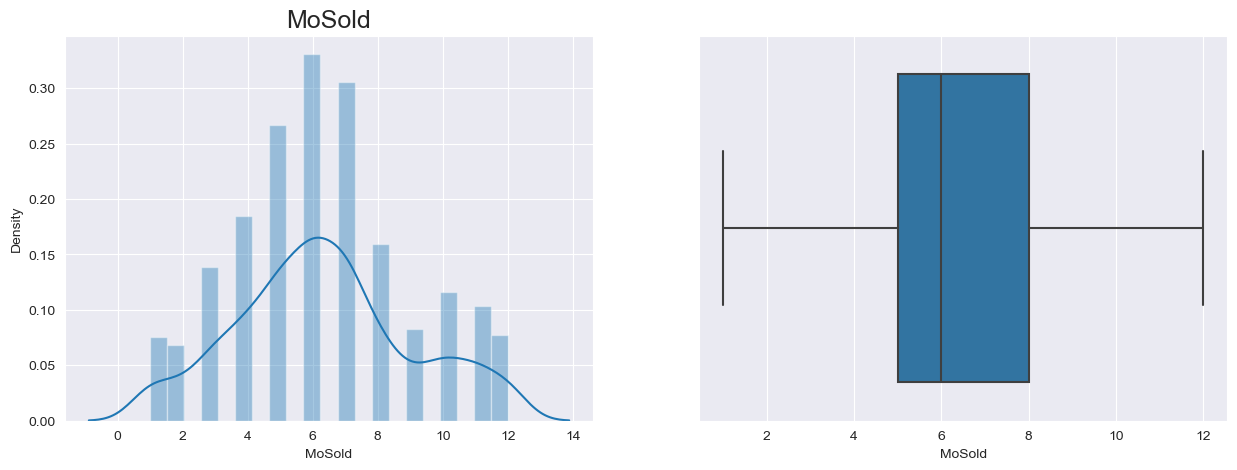

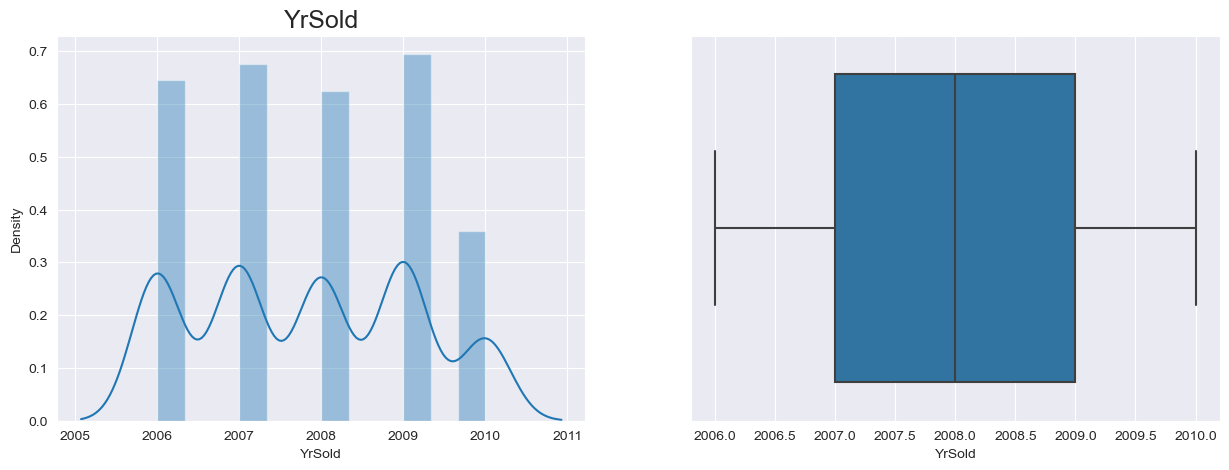

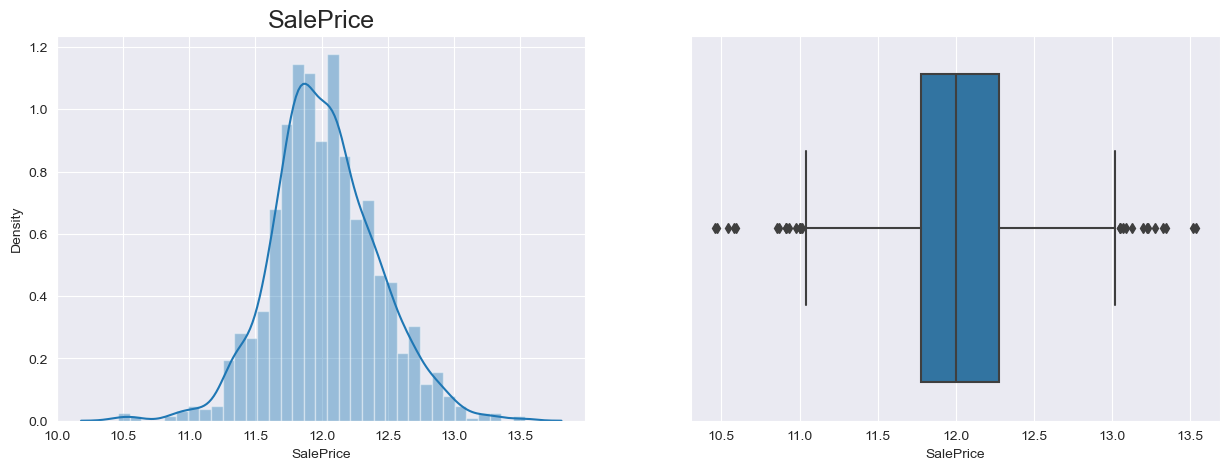

In [19]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show() 

#### Many of the numerical columns are having non-normal distribution
#### Most of the columns have outliers. So, we will require to do Outlier treatment

In [20]:
## View the unique values of all Categorical columns
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

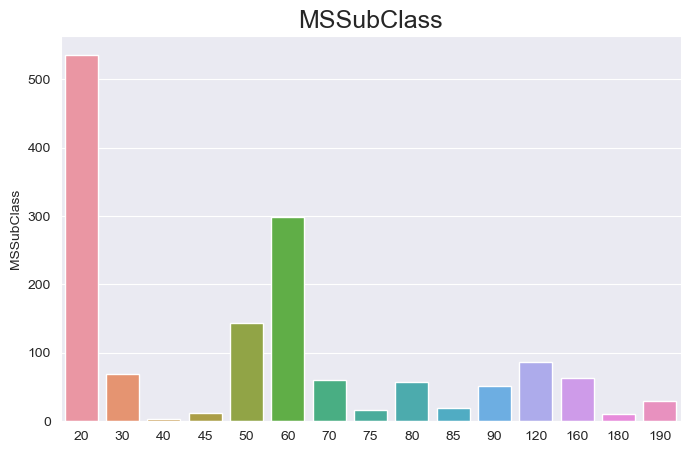

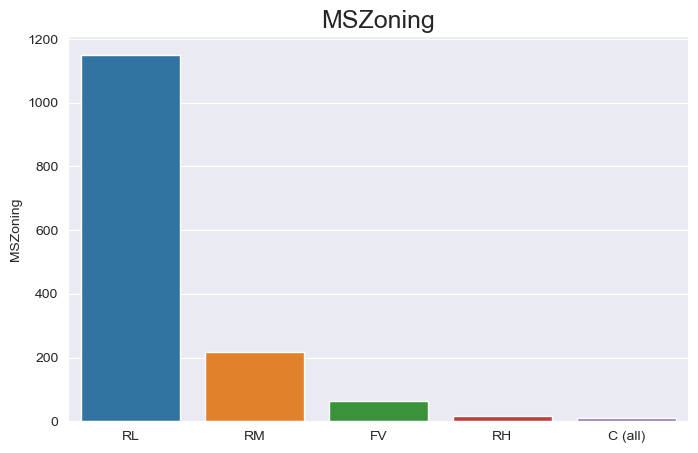

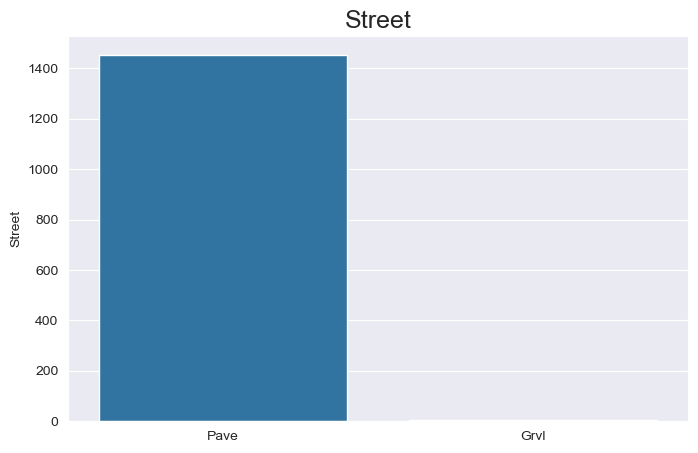

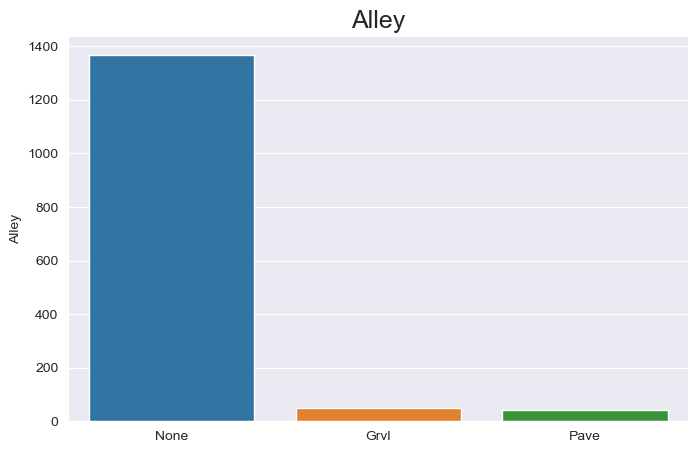

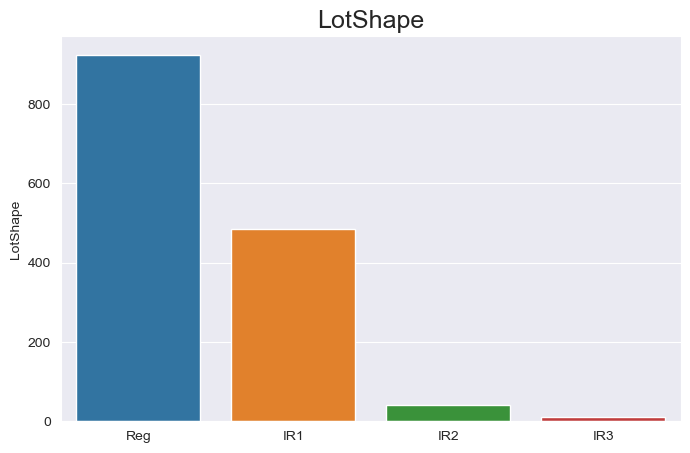

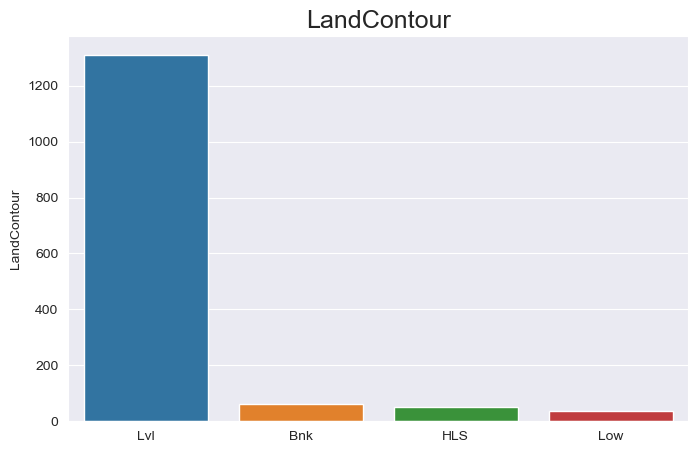

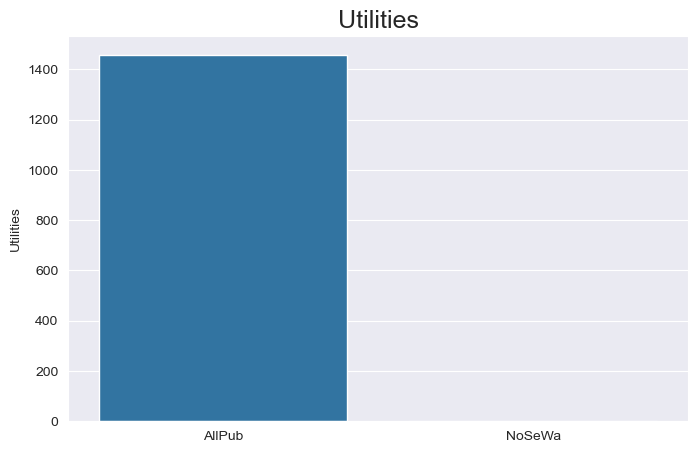

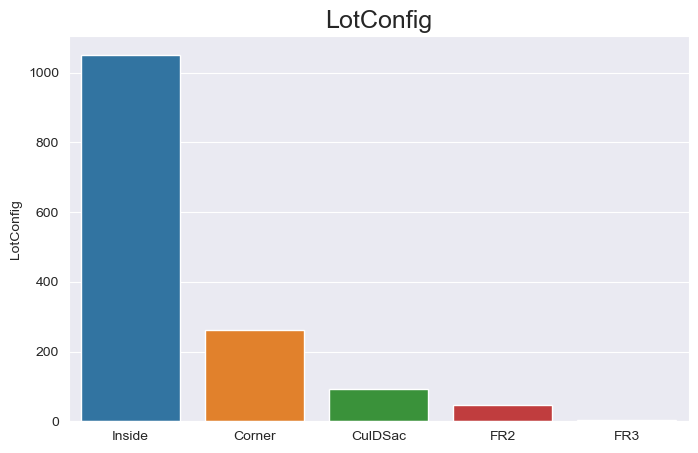

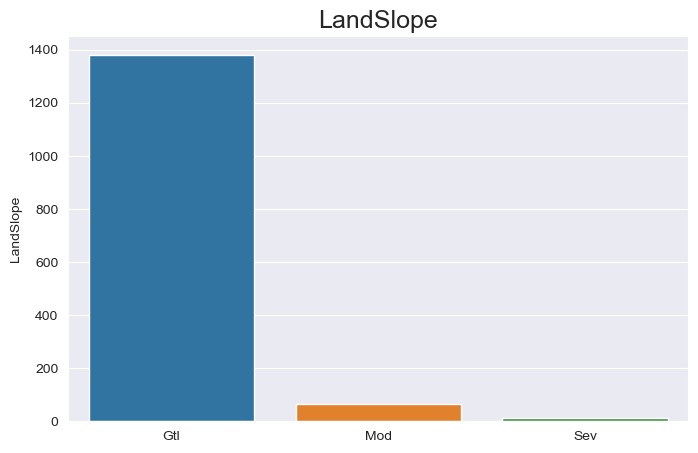

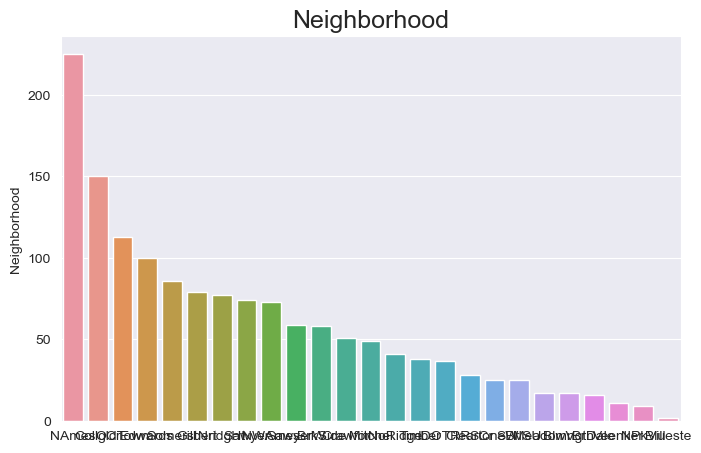

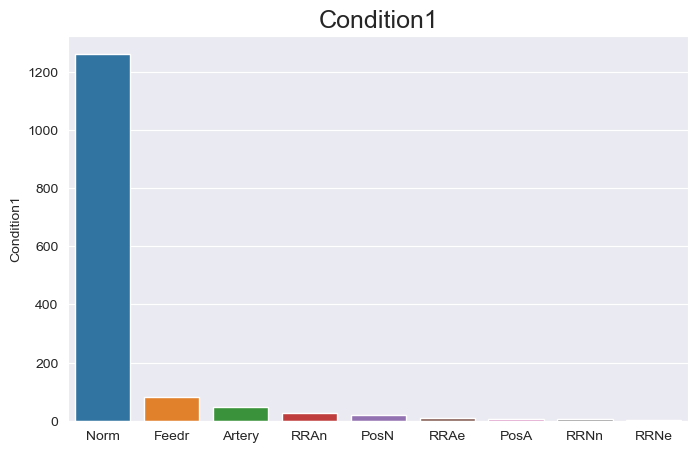

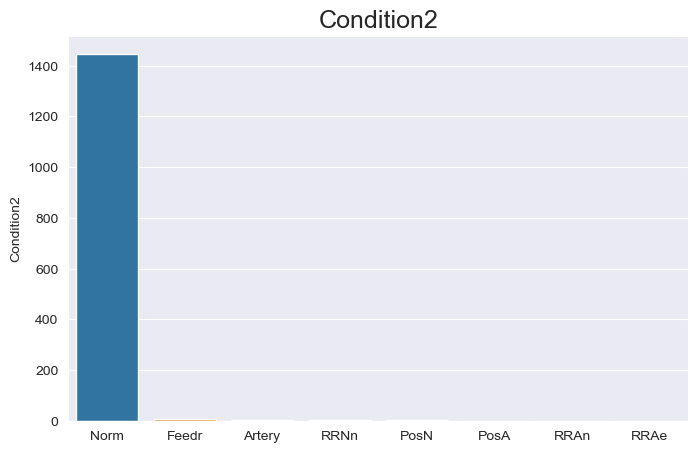

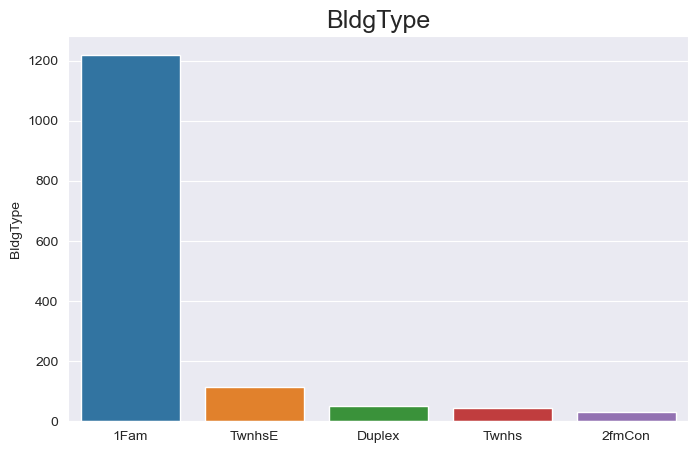

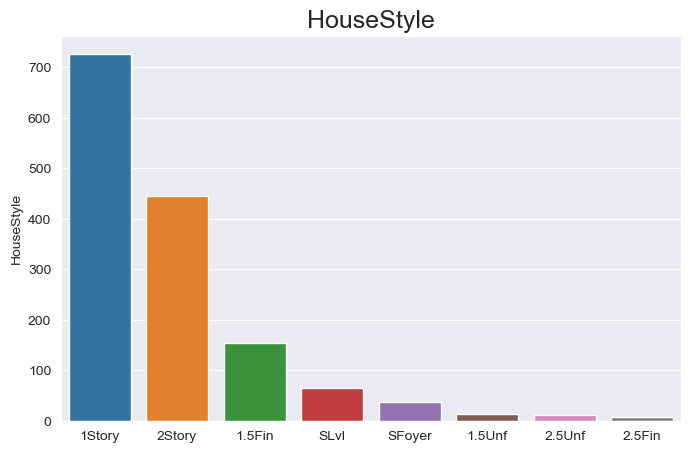

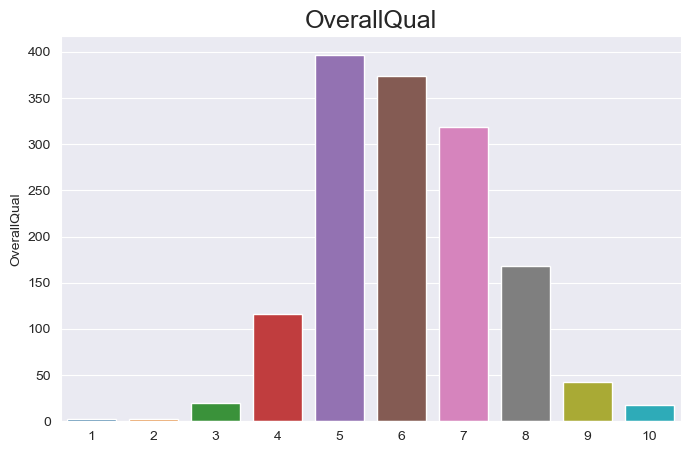

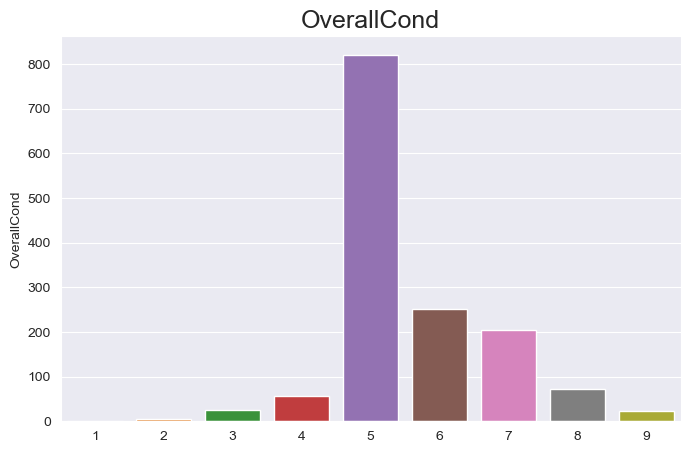

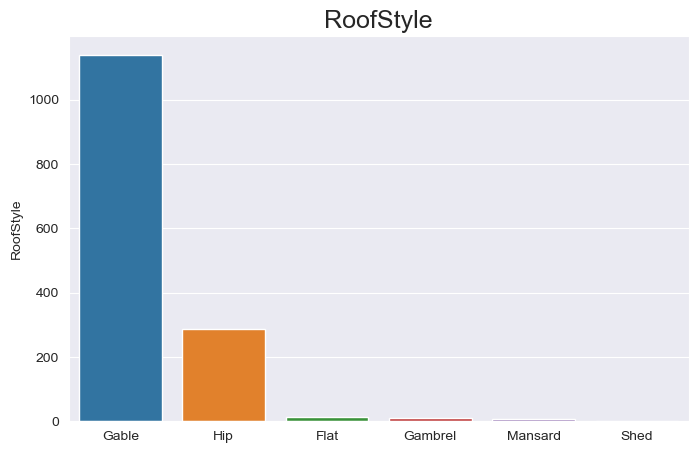

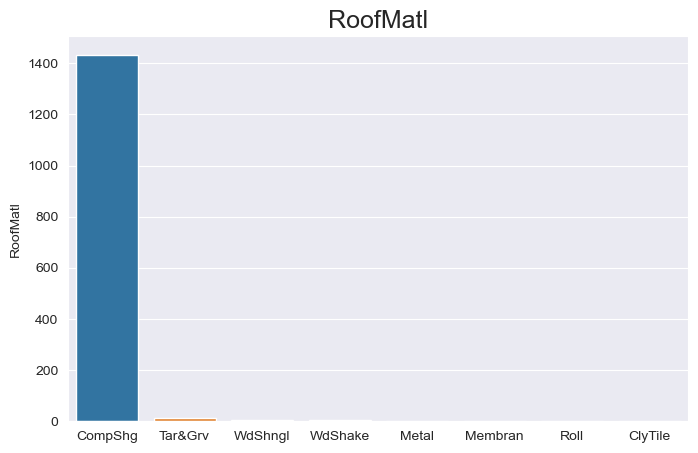

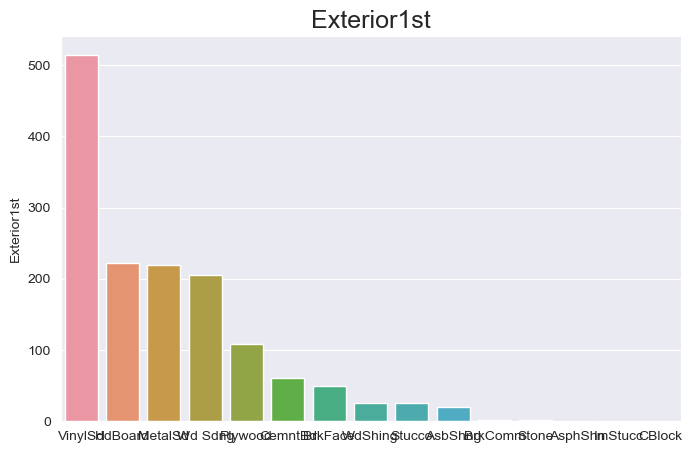

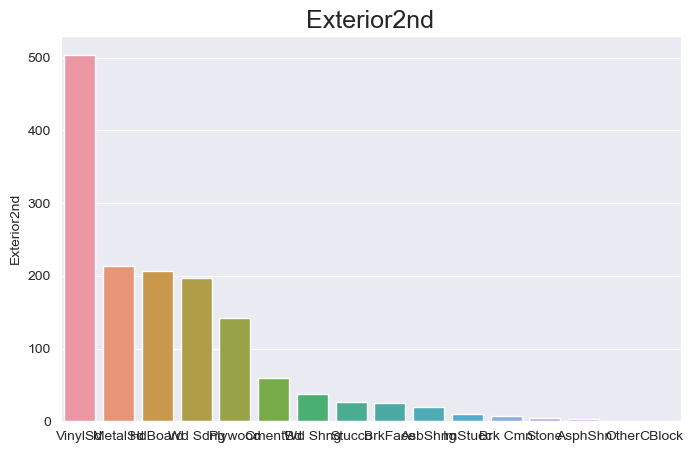

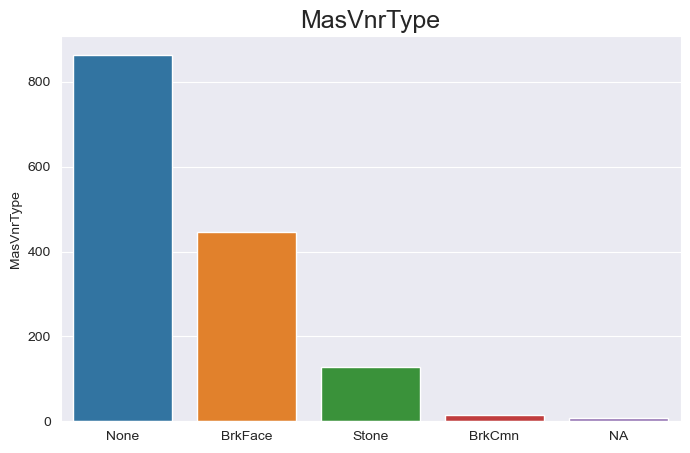

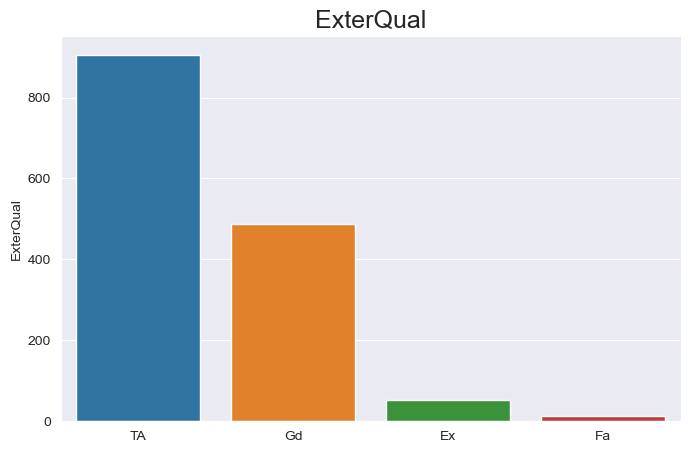

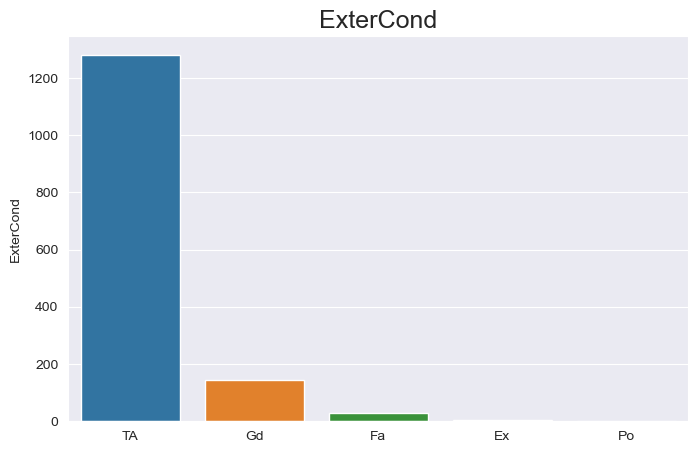

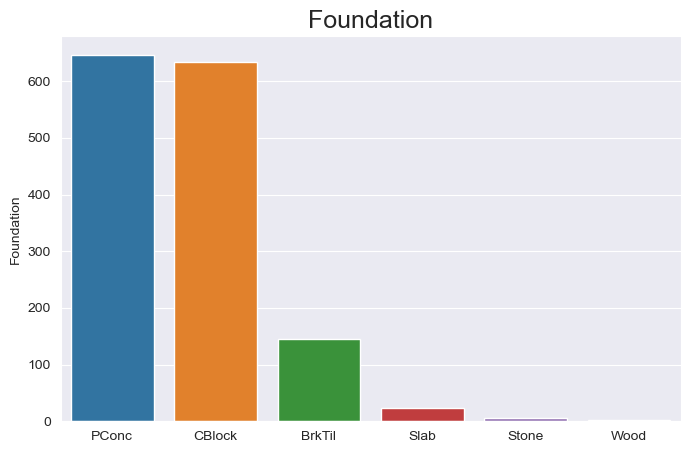

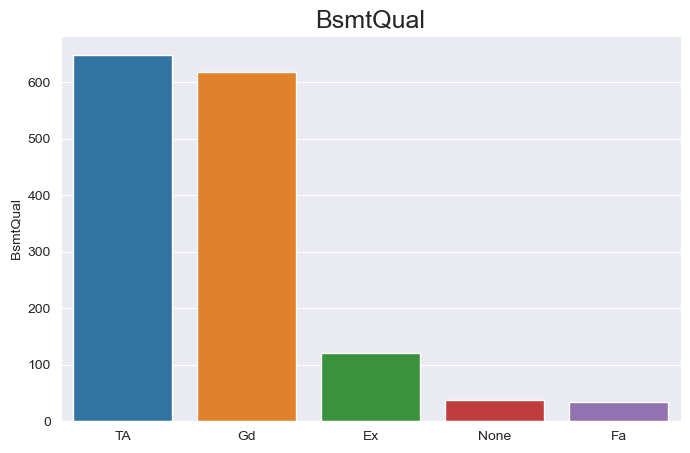

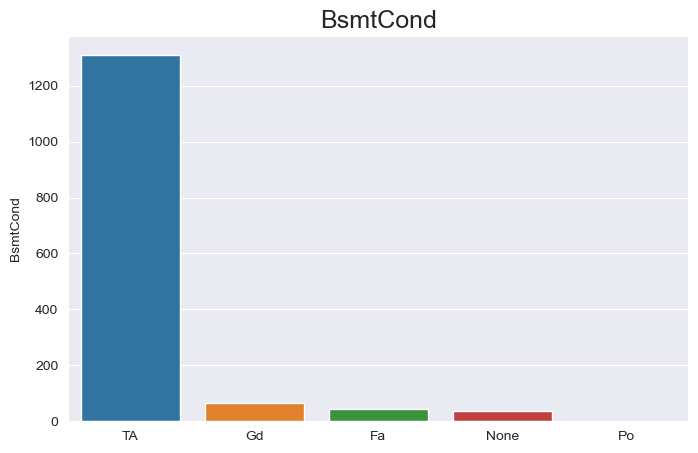

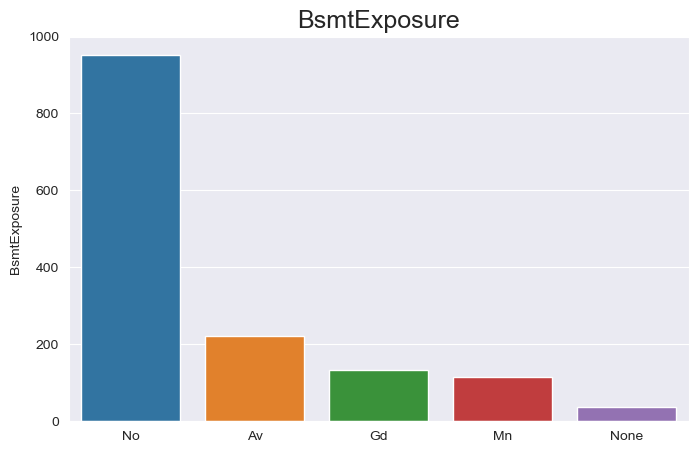

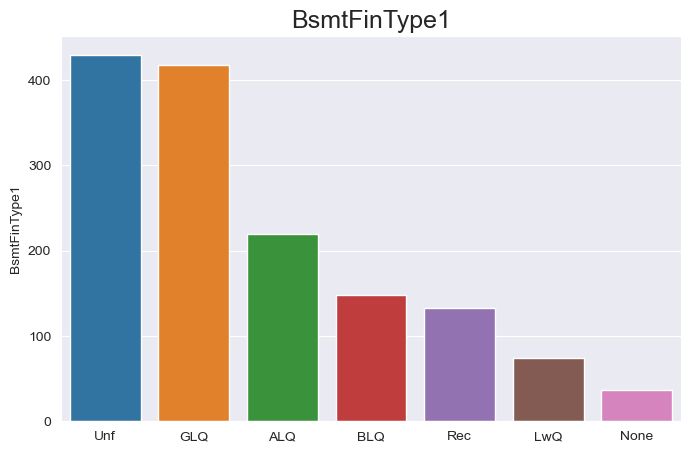

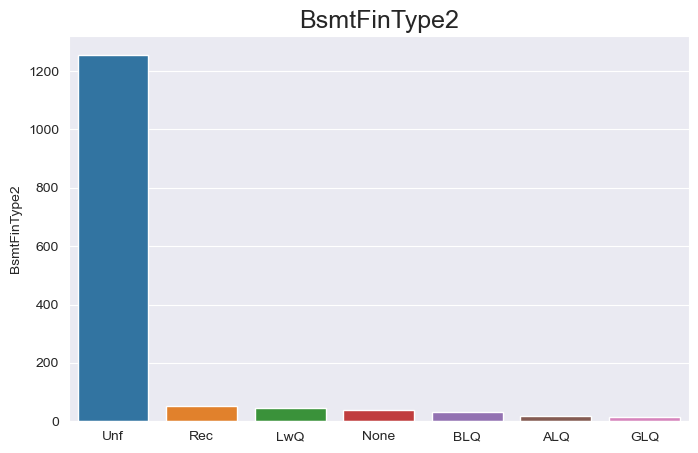

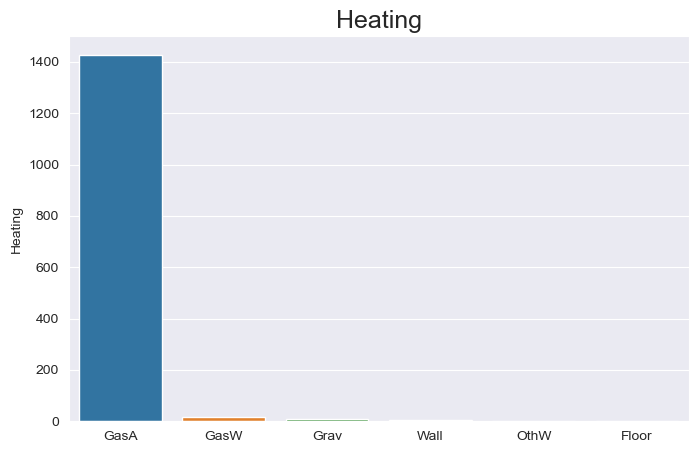

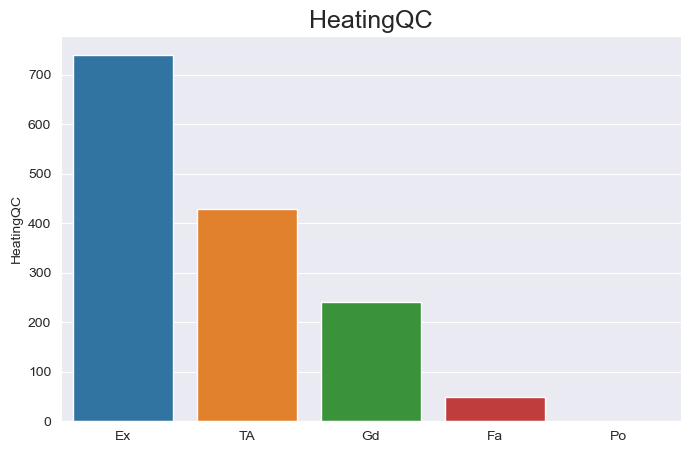

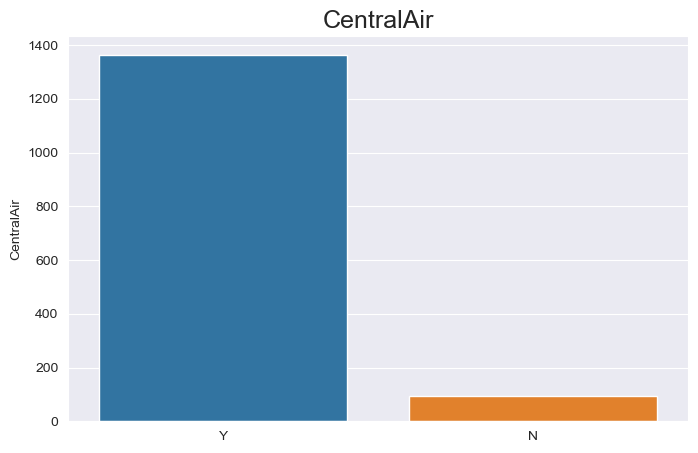

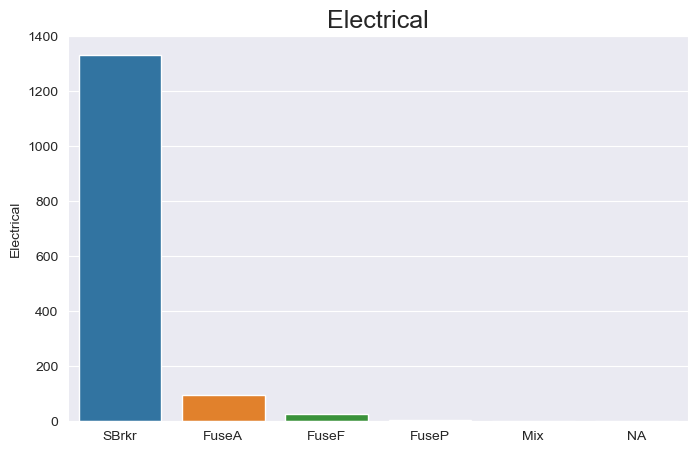

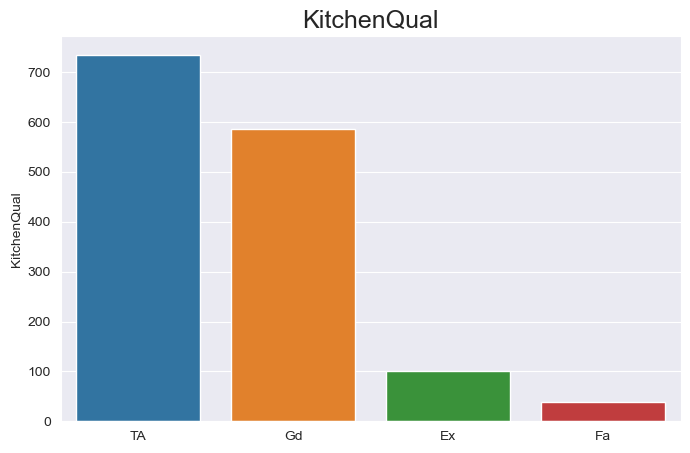

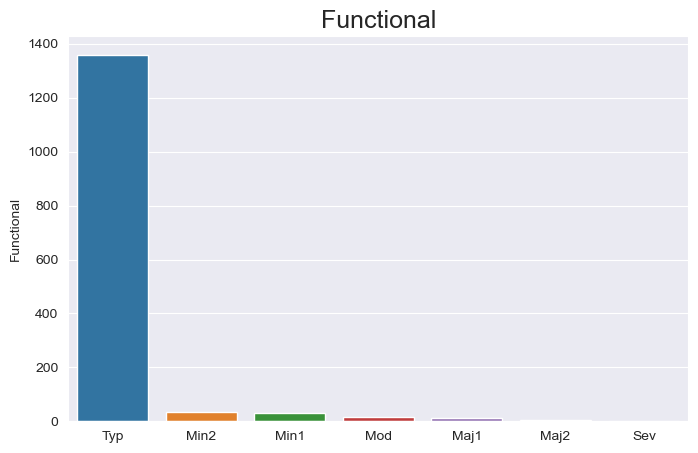

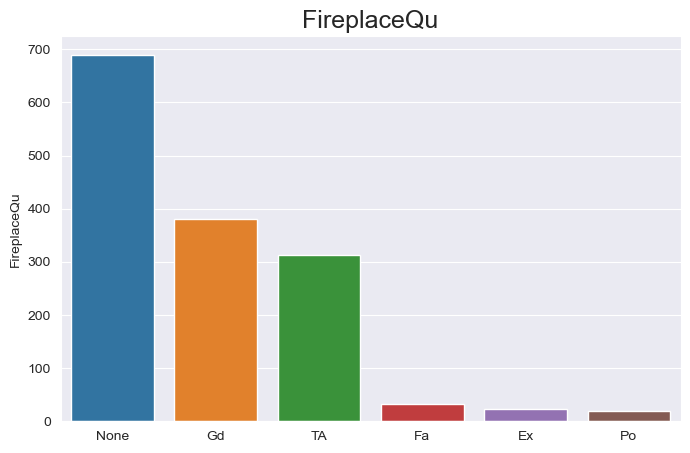

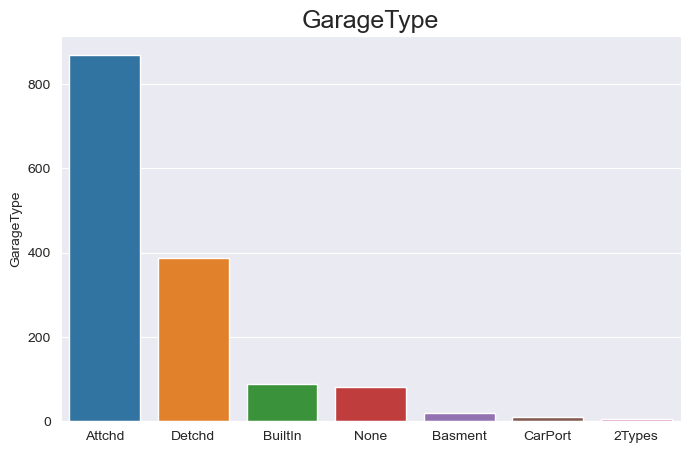

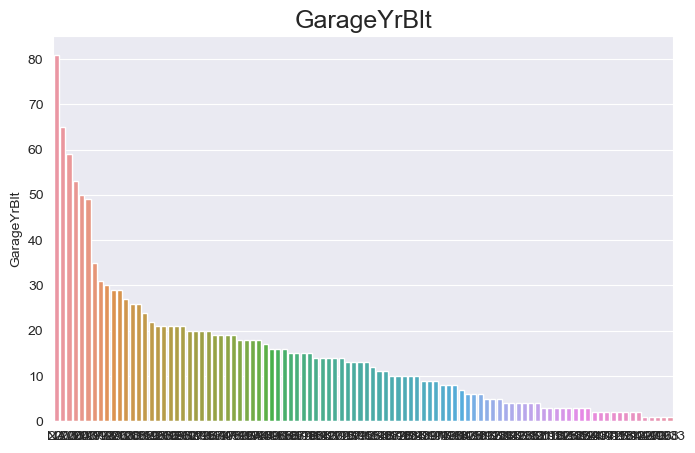

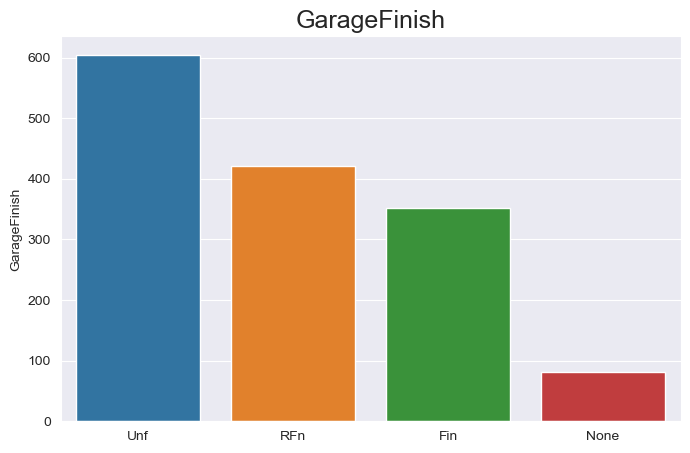

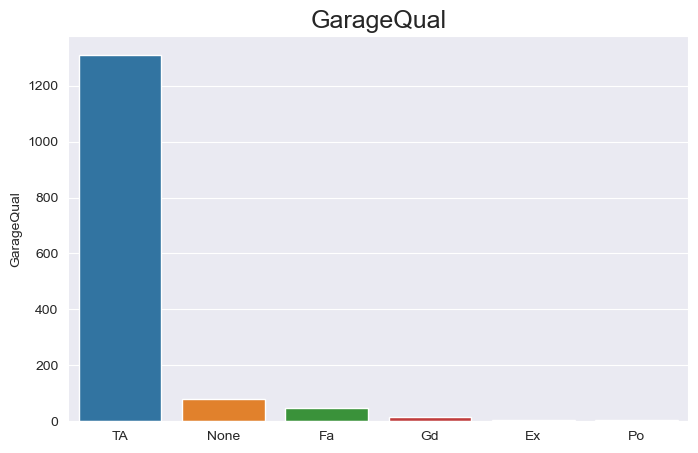

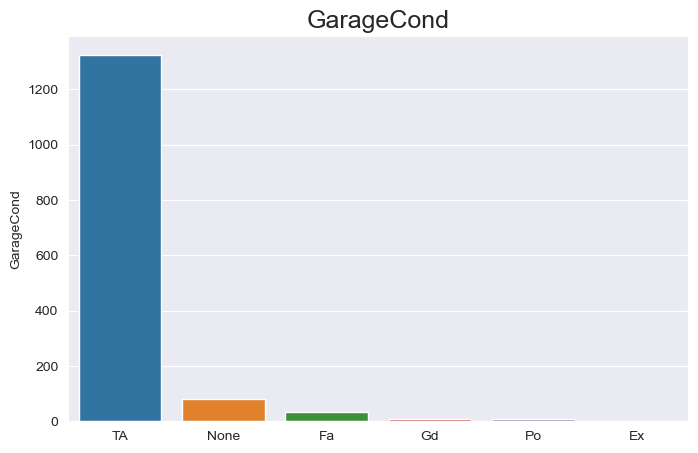

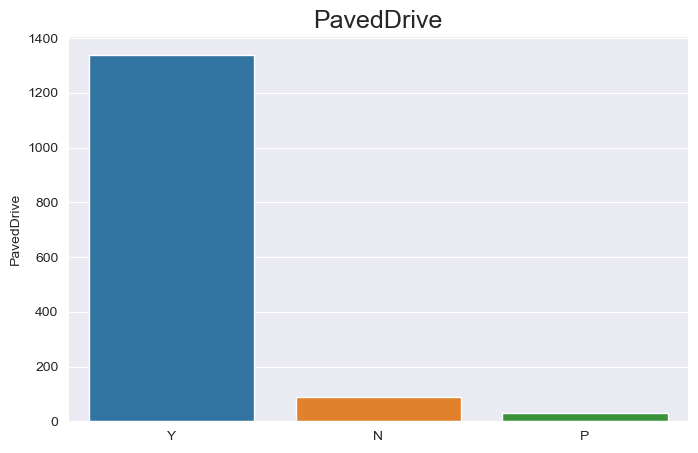

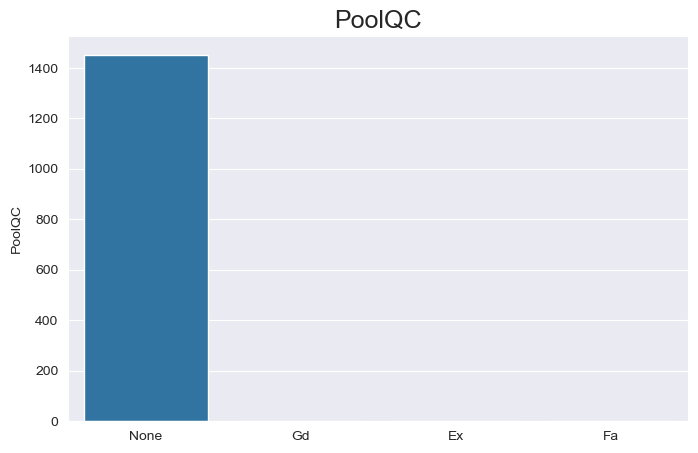

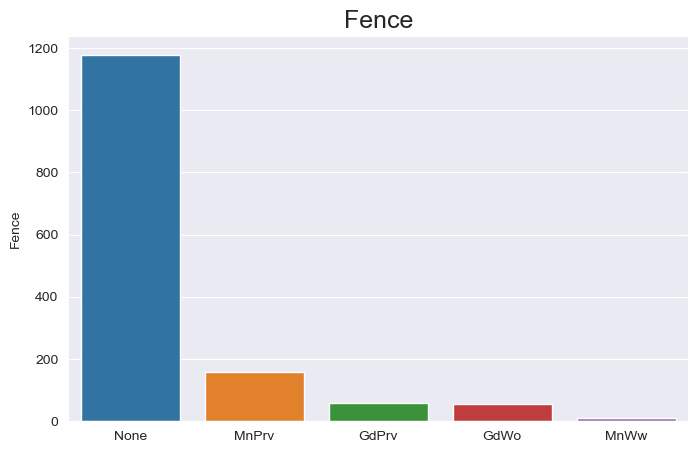

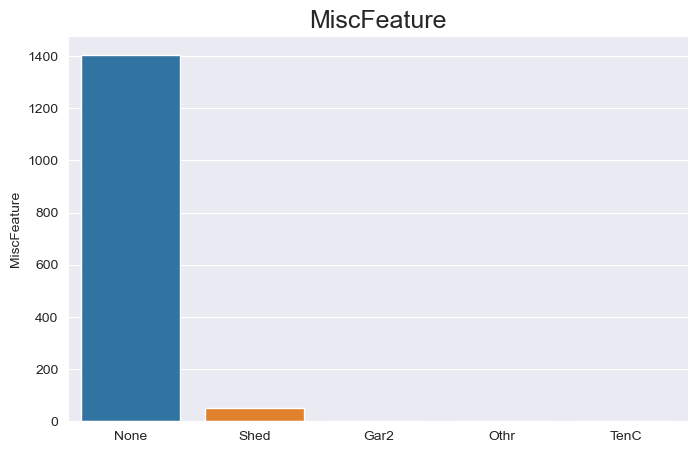

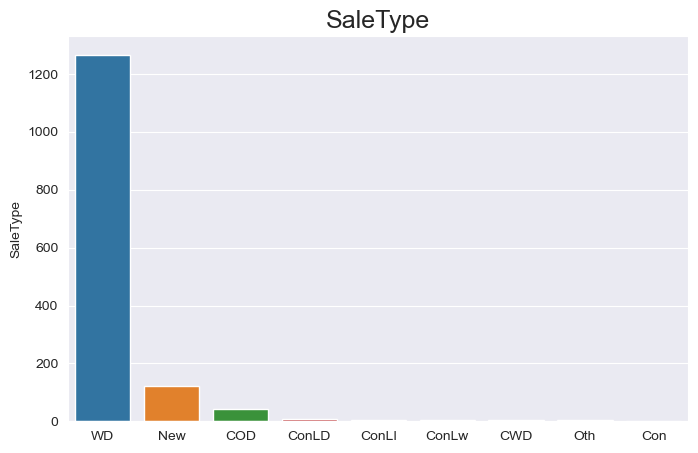

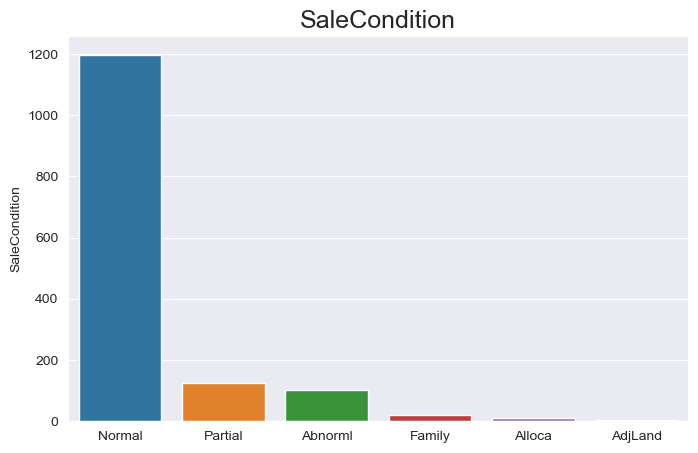

In [21]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())
    plt.show()

### Bivariate Analysis

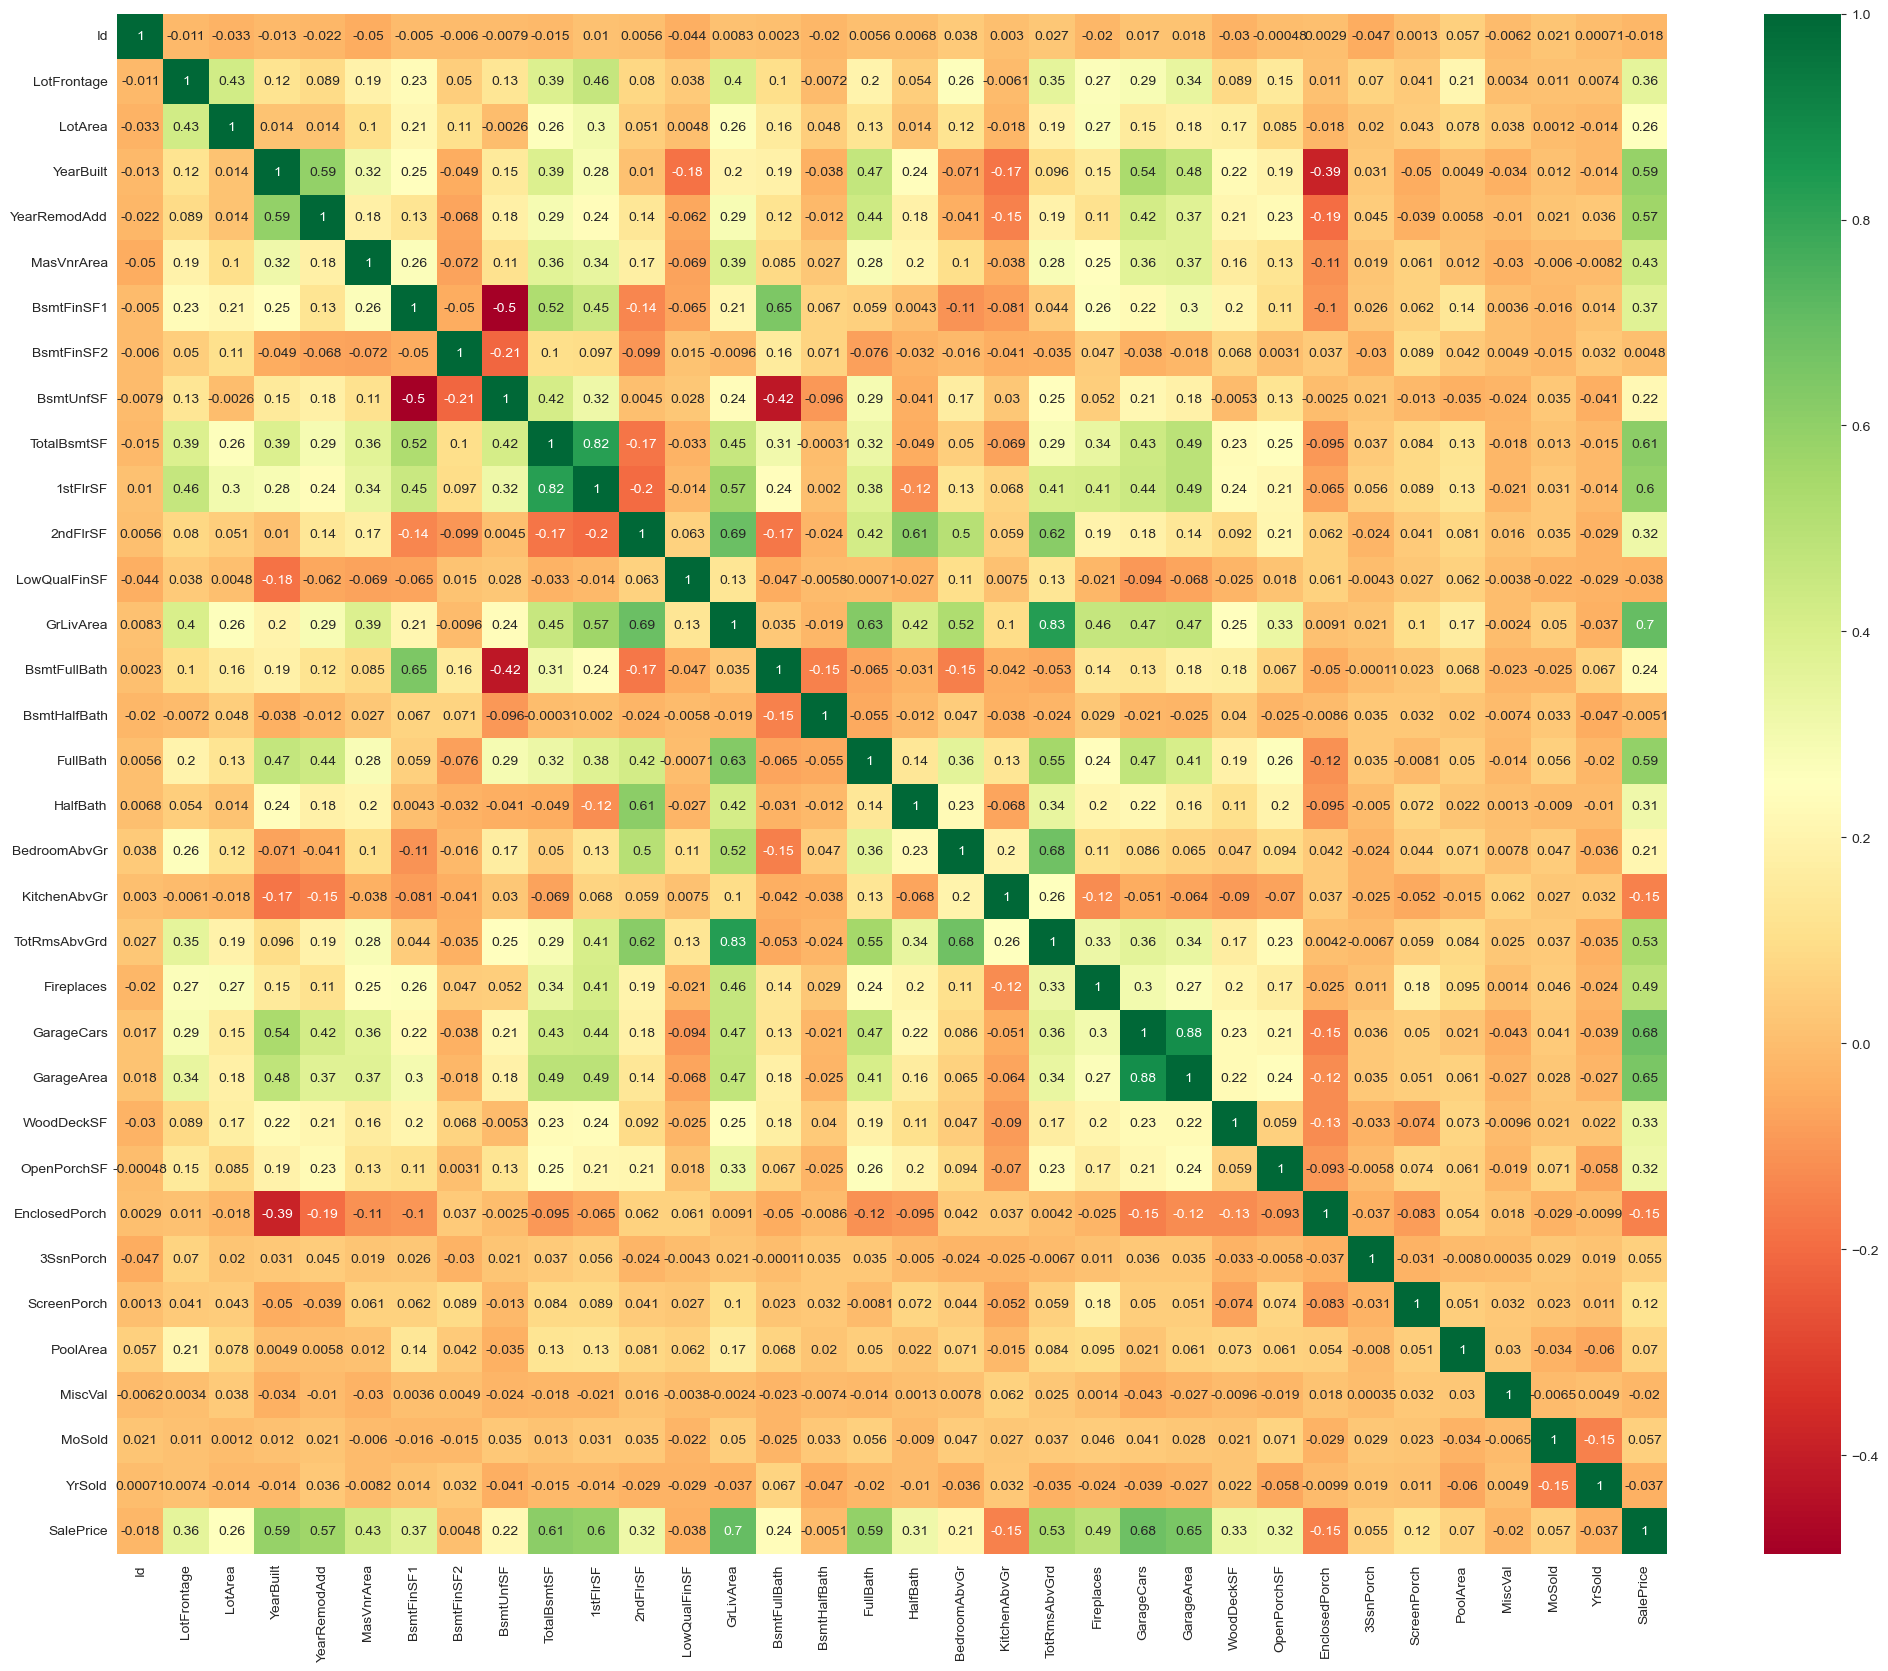

In [22]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

#### Many columns are highly correlated with each other
#### Target variable `SalePrice` is highly correlated with `GrLivArea`, `GarageCars` and `GarageArea`
#### As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression

## Feature Engineering

In [23]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

In [24]:
## Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [25]:
## View the dataframe again
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  SaleType SaleCondition  SalePrice  Age  
0       WD        Normal  12.247694    5  
1       WD        Normal  12.109011   31  
2       WD        Normal  12.317167    7  
3       WD       Abnorml  11.849398   91  
4       WD        Normal  12.429216    8  

[5 rows x 80 columns]

## Data Pre-Processing

### Missing Value Treatment

In [26]:
## View the missing values in all features
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Age                0
Length: 80, dtype: int64

#### There are missing values only in two columns `LotFrontage` and `MasVnrArea`       
#### As they are numerical columns, we will replace the missing values by mean value of the respective columns

In [27]:
## Replacing missing values in the above meniioned two columns by their means
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [28]:
## Check for missing values again 
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Age              0
Length: 80, dtype: int64

### Dummy Variable Creation

In [29]:
## Separate the categorical and numerical features again from original dataframe
## (as we have added one feature and removed two from original data)
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [30]:
## One hot encoding the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 353 columns]

In [31]:
## Check the dimensions
df_cat_encoded.shape

(1460, 353)

### Outlier treatment

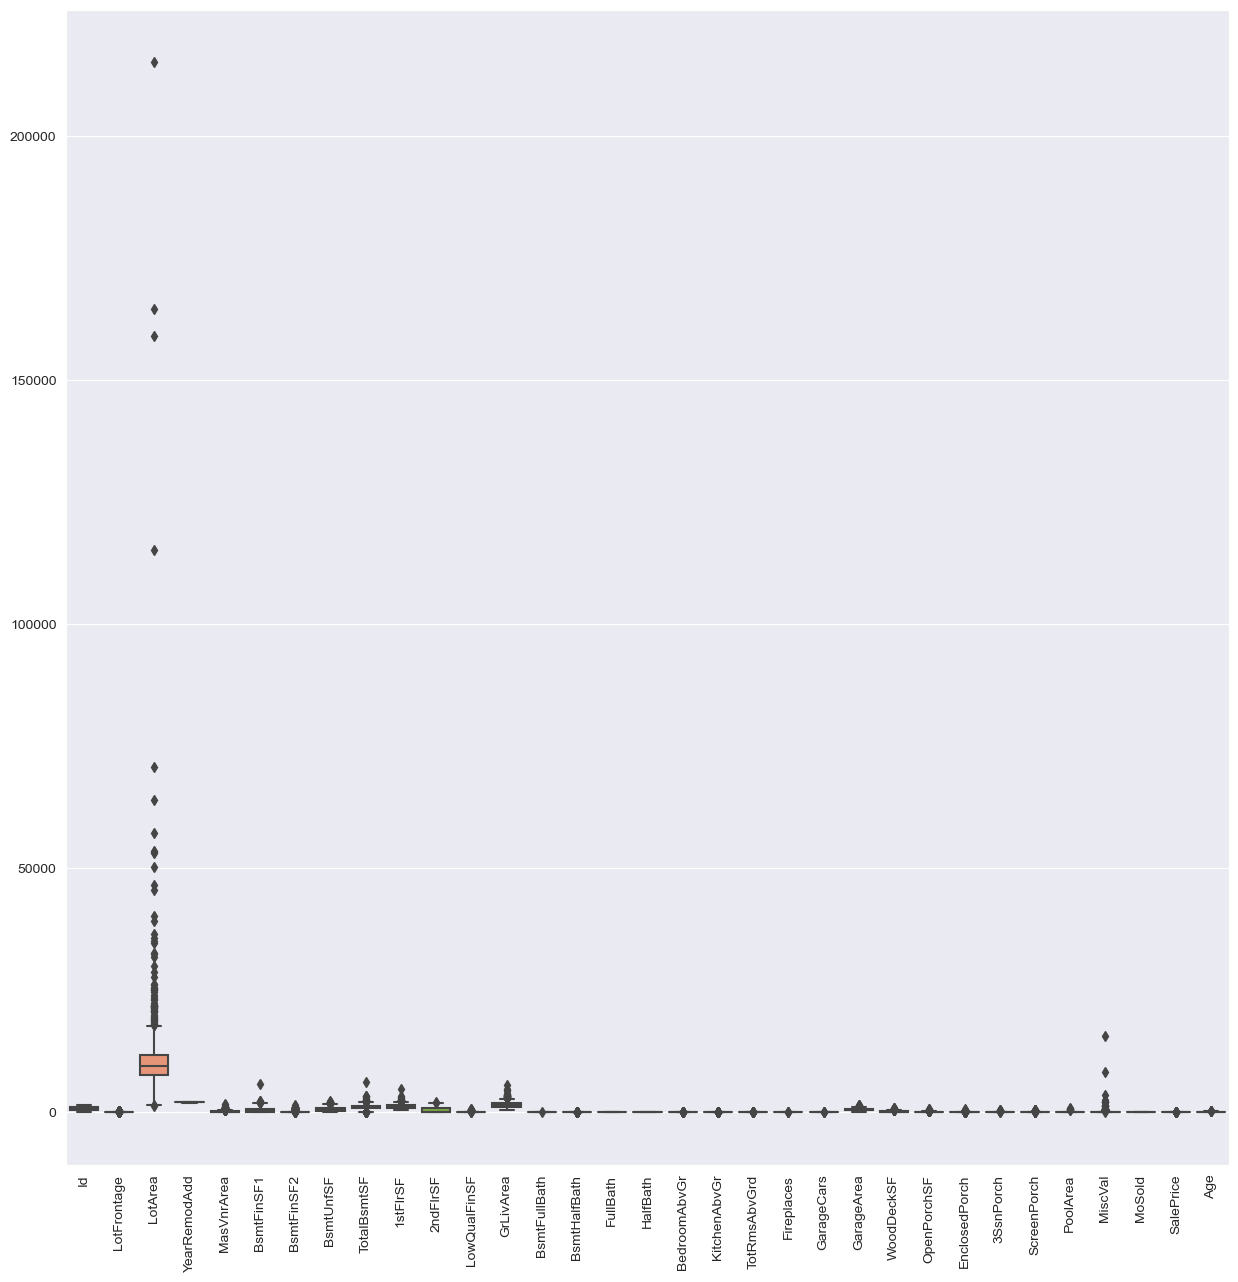

In [32]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [33]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

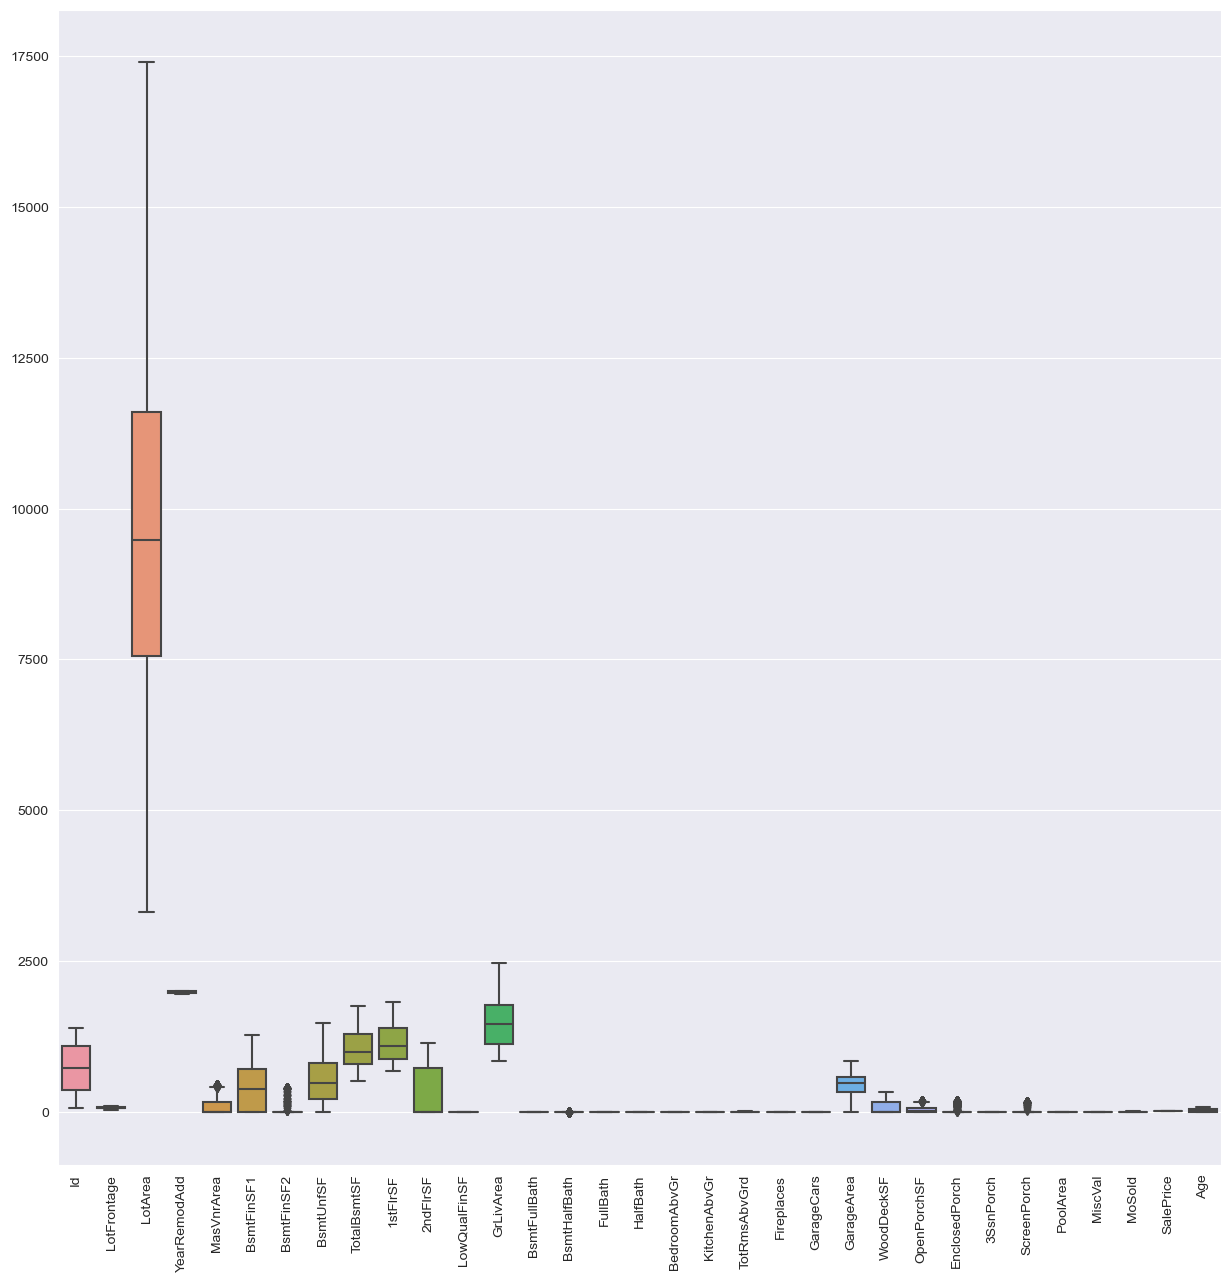

In [34]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

### We have removed outliers from all numerical columns

In [35]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


## View the first few rows of our dataframe
df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         0.0        150        856.0     856.0  ...               0   
1         0.0        284       1262.0    1262.0  ...               0   
2         0.0        434        920.0     920.0  ...               0   
3         0.0        540        756.0     961.0  ...               0   
4         0.0        490       1145.0    1145.0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 386 columns]

### Now, our dataframe is ready for model building

## Model Building, Tuning and Evaluation

### Split the Data into Dependent and Independent variables

In [36]:
## X contains all independent variables use to make predictions except 'Id' (not useful) and 'SalePrice' (target variable)
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0        150        856.0     856.0     854.0  ...               0   
1        284       1262.0    1262.0       0.0  ...               0   
2        434        920.0     920.0     866.0  ...               0   
3        540        756.0     961.0     756.0  ...               0   
4        490       1145.0    1145.0    1053.0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 384 columns]

In [37]:
## Separate out the target variable as y which we want to predict
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Train - Test Split

In [38]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [39]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


In [40]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


### Scaling numerical columns

In [41]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [42]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model 1: Ridge Regression

In [43]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [44]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [46]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.06319361, 0.04726138, 0.03496203, 0.02925763, 0.03184924,
        0.0300848 , 0.02819519, 0.02999506, 0.03256183, 0.02829866,
        0.02992682, 0.03210335, 0.03016243, 0.02798395, 0.02757912,
        0.02674971, 0.02833581, 0.02509427, 0.02510753, 0.02431893,
        0.02617583, 0.02346635, 0.0241363 , 0.02456803, 0.02771187,
        0.03090844, 0.02999272, 0.02686253]),
 'std_fit_time': array([0.01511235, 0.01342321, 0.00260484, 0.00171004, 0.00255642,
        0.00154173, 0.00110958, 0.00163028, 0.00204962, 0.00119799,
        0.00278696, 0.01014351, 0.0056611 , 0.00600505, 0.00421464,
        0.00307247, 0.00151362, 0.00328437, 0.00238342, 0.00265927,
        0.003205  , 0.00256383, 0.00193392, 0.00151496, 0.00094204,
        0.00287778, 0.00097169, 0.0029906 ]),
 'mean_score_time': array([0.00800805, 0.00758886, 0.00731316, 0.00678267, 0.00656066,
        0.00672255, 0.00713892, 0.00662742, 0.0070868 , 0.00687656,
        0.00688701, 0.0068418 , 0.006993

## We got optimum value of alpha as 10. Now we will build a ridge regression model using this value.¶

In [47]:
# Create a ridge regression instance with optimum value alpha=10
ridge = Ridge(alpha=10)

In [48]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [49]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 6.56023354e-03,  2.07307896e-02,  2.49825538e-02, -2.40354563e-03,
        1.00177182e-02, -3.15225697e-04, -1.49039561e-02,  5.20474484e-02,
        7.45664130e-03,  2.88435254e-02,  0.00000000e+00,  8.85807944e-02,
        8.24181724e-03, -4.24723298e-04,  1.17438229e-02,  1.25064397e-02,
        4.98554634e-03,  0.00000000e+00, -3.41180286e-04,  1.92127953e-02,
        1.68790936e-02,  1.67328322e-02,  1.23269319e-02,  7.87306236e-03,
        2.53822117e-03,  0.00000000e+00,  1.07139979e-02,  0.00000000e+00,
        0.00000000e+00, -7.78499263e-04, -5.04655943e-02, -4.07061234e-02,
        5.51648124e-03,  6.20801048e-04, -4.85860044e-03, -5.71150836e-03,
        3.91666483e-02,  3.10825761e-02,  7.08003745e-04,  4.75844066e-03,
       -3.48924107e-02,  5.93672173e-03, -5.14776147e-02, -1.19237188e-02,
       -1.79847431e-02,  3.50102825e-02,  1.44037721e-02,  1.11946464e-02,
       -2.40515945e-02, -5.34877888e-03, -5.46542710e-03,  1.64560909e-02,
        1.08365421e-02, -

In [50]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [51]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


### We will plot R2 Score against different values of alpha for both train and test sets

In [52]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.063194      0.015112         0.008008        0.001193      0.0001   
1        0.047261      0.013423         0.007589        0.000739       0.001   
2        0.034962      0.002605         0.007313        0.001660        0.01   
3        0.029258      0.001710         0.006783        0.000732        0.05   
4        0.031849      0.002556         0.006561        0.000458         0.1   
5        0.030085      0.001542         0.006723        0.000222         0.2   
6        0.028195      0.001110         0.007139        0.000911         0.3   
7        0.029995      0.001630         0.006627        0.000144         0.4   
8        0.032562      0.002050         0.007087        0.000288         0.5   
9        0.028299      0.001198         0.006877        0.000361         0.6   
10       0.029927      0.002787         0.006887        0.000646         0.7   
11       0.032103      0.010144         0.006842        0.000382         0.8   
12       0.030162      0.005661         0.006994        0.000567         0.9   
13       0.027984      0.006005         0.006584        0.001153         1.0   
14       0.027579      0.004215         0.006303        0.000638         2.0   
15       0.026750      0.003072         0.007102        0.000661         3.0   
16       0.028336      0.001514         0.006798        0.000160         4.0   
17       0.025094      0.003284         0.007006        0.000489         5.0   
18       0.025108      0.002383         0.007375        0.000912         6.0   
19       0.024319      0.002659         0.007046        0.000577         7.0   
20       0.026176      0.003205         0.008285        0.002445         8.0   
21       0.023466      0.002564         0.007097        0.000333         9.0   
22       0.024136      0.001934         0.006909        0.000498        10.0   
23       0.024568      0.001515         0.006943        0.001030          20   
24       0.027712      0.000942         0.006978        0.000286          50   
25       0.030908      0.002878         0.006851        0.000288         100   
26       0.029993      0.000972         0.006835        0.000640         500   
27       0.026863      0.002991         0.004339        0.000718        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.081673          -0.101828   
1    {'alpha': 0.001}          -0.081586          -0.100936   
2     {'alpha': 0.01}          -0.080603          -0.098118   
3     {'alpha': 0.05}          -0.080104          -0.094781   
4      {'alpha': 0.1}          -0.079578          -0.092349   
5      {'alpha': 0.2}          -0.078602          -0.089576   
6      {'alpha': 0.3}          -0.077658          -0.087865   
7      {'alpha': 0.4}          -0.076766          -0.086746   
8      {'alpha': 0.5}          -0.075957          -0.085866   
9      {'alpha': 0.6}          -0.075217          -0.085126   
10     {'alpha': 0.7}          -0.074599          -0.084513   
11     {'alpha': 0.8}          -0.074151          -0.084037   
12     {'alpha': 0.9}          -0.073747          -0.083640   
13     {'alpha': 1.0}          -0.073381          -0.083293   
14     {'alpha': 2.0}          -0.070959          -0.081103   
15     {'alpha': 3.0}          -0.069506          -0.080140   
16     {'alpha': 4.0}          -0.068657          -0.079670   
17     {'alpha': 5.0}          -0.068032          -0.079504   
18     {'alpha': 6.0}          -0.067567          -0.079530   
19     {'alpha': 7.0}          -0.067257          -0.079612   
20     {'alpha': 8.0}          -0.067030          -0.079713   
21     {'alpha': 9.0}          -0.066859          -0.079824   
22    {'alpha': 10.0}          -0.066765          -0.079957   
23      {'alpha': 20}          -0.067106          -0.081396   
24      {'alpha': 50}          -0.070718          -0.085138   
25     {'alpha': 100}          -0.074230     

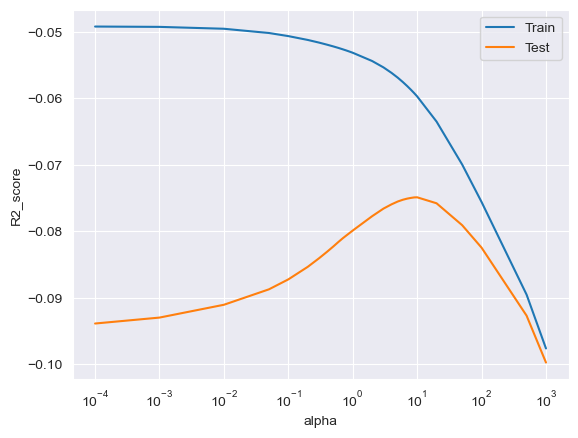

In [53]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.
### From graph also, it is apparent that the optimal value of alpha is 10.

## Model 2: Lasso Regression

In [54]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [56]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.13937154, 0.0516736 , 0.02689738, 0.02374063, 0.01758709,
        0.01558685, 0.02014222, 0.01442866, 0.01529727, 0.01619306,
        0.01550717, 0.01452498, 0.01497159, 0.01421528, 0.01469326,
        0.0148119 , 0.01448631, 0.01390643, 0.01604052, 0.01417823,
        0.01516929, 0.014498  , 0.01496162, 0.01501818, 0.0163918 ,
        0.01660218, 0.01723499, 0.01633739]),
 'std_fit_time': array([0.0336473 , 0.0214842 , 0.0025306 , 0.00369134, 0.00203263,
        0.00124776, 0.00492013, 0.0018327 , 0.00112928, 0.00293397,
        0.00225354, 0.00169834, 0.00141957, 0.00112926, 0.00106681,
        0.0025029 , 0.00127503, 0.00038213, 0.00275254, 0.00092362,
        0.00168903, 0.00128505, 0.00149252, 0.00093481, 0.00112065,
        0.0007361 , 0.00097312, 0.00060328]),
 'mean_score_time': array([0.00678477, 0.00621972, 0.00618801, 0.0061657 , 0.00592833,
        0.00664196, 0.00678325, 0.00602632, 0.0071166 , 0.00593872,
        0.0059473 , 0.00635085, 0.005954

### We got optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.¶

In [57]:
## Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [58]:
## Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [59]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [60]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [61]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


### Now, we will plot R2 Score against different values of alpha for both train and test sets

In [62]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.139372      0.033647         0.006785        0.000510      0.0001   
1        0.051674      0.021484         0.006220        0.000709       0.001   
2        0.026897      0.002531         0.006188        0.000598        0.01   
3        0.023741      0.003691         0.006166        0.000275        0.05   
4        0.017587      0.002033         0.005928        0.000089         0.1   
5        0.015587      0.001248         0.006642        0.001612         0.2   
6        0.020142      0.004920         0.006783        0.001673         0.3   
7        0.014429      0.001833         0.006026        0.000681         0.4   
8        0.015297      0.001129         0.007117        0.002211         0.5   
9        0.016193      0.002934         0.005939        0.000173         0.6   
10       0.015507      0.002254         0.005947        0.000249         0.7   
11       0.014525      0.001698         0.006351        0.000387         0.8   
12       0.014972      0.001420         0.005954        0.000242         0.9   
13       0.014215      0.001129         0.005898        0.000113         1.0   
14       0.014693      0.001067         0.006299        0.000861         2.0   
15       0.014812      0.002503         0.005791        0.000427         3.0   
16       0.014486      0.001275         0.006015        0.000417         4.0   
17       0.013906      0.000382         0.005757        0.000187         5.0   
18       0.016041      0.002753         0.005836        0.000380         6.0   
19       0.014178      0.000924         0.006052        0.000278         7.0   
20       0.015169      0.001689         0.006036        0.000207         8.0   
21       0.014498      0.001285         0.006435        0.000474         9.0   
22       0.014962      0.001493         0.005954        0.000525        10.0   
23       0.015018      0.000935         0.005767        0.000166          20   
24       0.016392      0.001121         0.006229        0.000791          50   
25       0.016602      0.000736         0.006058        0.000520         100   
26       0.017235      0.000973         0.005919        0.000465         500   
27       0.016337      0.000603         0.004182        0.000812        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.069359          -0.081482   
1    {'alpha': 0.001}          -0.068861          -0.081934   
2     {'alpha': 0.01}          -0.091298          -0.110751   
3     {'alpha': 0.05}          -0.109268          -0.132709   
4      {'alpha': 0.1}          -0.144592          -0.168175   
5      {'alpha': 0.2}          -0.239648          -0.251524   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

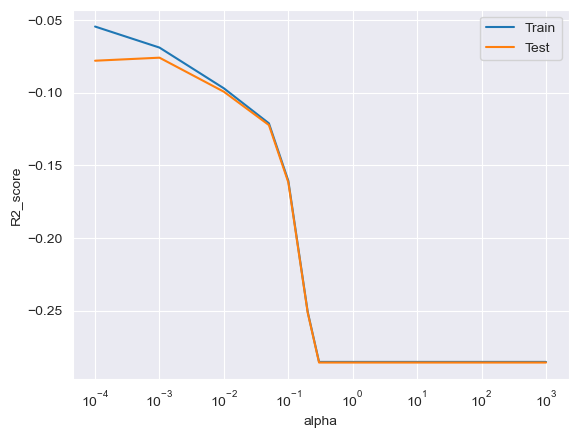

In [63]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### As the value of alpha increases, we see a decrease in both train and test error.
### However, after a error value of approximately 0.05, error remains constant.

## Comparing the two models

In [64]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format

In [65]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.92
R2 Score (Test)               0.93              0.93
RSS (Train)                   8.53             11.29
RSS (Test)                    2.87              2.92
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.10
RMSE (Test)                   0.10              0.10

### The R2 score on test data is 0.93 for both Ridge Regression and Lasso models

In [66]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

[384 rows x 0 columns]

In [67]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [68]:
## View the betas/coefficients
betas

Ridge  Lasso
LotFrontage             0.01   0.00
LotArea                 0.02   0.02
YearRemodAdd            0.02   0.03
MasVnrArea             -0.00  -0.00
BsmtFinSF1              0.01   0.03
...                      ...    ...
SaleCondition_AdjLand   0.02   0.00
SaleCondition_Alloca    0.06   0.00
SaleCondition_Family   -0.01  -0.00
SaleCondition_Normal    0.03   0.02
SaleCondition_Partial   0.02   0.02

[384 rows x 2 columns]

In [69]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

Ridge  Lasso
MasVnrArea             -0.00  -0.00
BsmtUnfSF              -0.01  -0.00
1stFlrSF                0.01  -0.00
LowQualFinSF            0.00   0.00
BsmtHalfBath           -0.00   0.00
...                      ...    ...
SaleType_Oth            0.02   0.00
SaleType_WD            -0.00  -0.00
SaleCondition_AdjLand   0.02   0.00
SaleCondition_Alloca    0.06   0.00
SaleCondition_Family   -0.01  -0.00

[306 rows x 2 columns]

In [70]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(306, 2)

### The above 306 features out of 384 (from X_train) have been removed by Lasso. In this way, lasso performs feature selection
### Below are the features selected by Lasso

In [71]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.00
LotArea                  0.02
YearRemodAdd             0.03
BsmtFinSF1               0.03
BsmtFinSF2               0.00
                         ... 
GarageType_Attchd        0.02
GarageYrBlt_2009         0.00
GarageFinish_Unf        -0.01
SaleCondition_Normal     0.02
SaleCondition_Partial    0.02
Name: Lasso, Length: 78, dtype: float64

## Inferences for 'Surprise Housing'

#### Now, we will look at the top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [72]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.09
OverallQual_9          0.08
OverallQual_8          0.08
Neighborhood_Crawfor   0.08
OverallCond_9          0.07
Functional_Typ         0.07
Exterior1st_BrkFace    0.07
SaleCondition_Alloca   0.06
CentralAir_Y           0.05
TotalBsmtSF            0.05
Name: Ridge, dtype: float64

In [73]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.08
OverallQual_8          1.08
Neighborhood_Crawfor   1.08
OverallCond_9          1.08
Functional_Typ         1.07
Exterior1st_BrkFace    1.07
SaleCondition_Alloca   1.07
CentralAir_Y           1.06
TotalBsmtSF            1.05
Name: Ridge, dtype: float64

In [74]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.12
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.09
Exterior1st_BrkFace    0.08
Functional_Typ         0.08
CentralAir_Y           0.05
Neighborhood_Somerst   0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Name: Lasso, dtype: float64

In [75]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.12
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.09
Exterior1st_BrkFace    0.08
Functional_Typ         0.08
CentralAir_Y           0.05
Neighborhood_Somerst   0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Name: Lasso, dtype: float64

## Inferences:
### The variables significant in predicting the price of a house are: - 
`GrLivArea`, `OverallQual_9`, `OverallCond_9`, `OverallQual_8`, `Neighborhood_Crawfor`, `Functional_Typ`, `Exterior1st_BrkFace`, `SaleCondition_Alloca`, `CentralAir_Y`, `TotalBsmtSF`, `Neighborhood_Somerst`, `TotalBsmtSF` and `Condition1_Norm`          


### How well those variables describe the price of a house?
Here will see only top few variables
- `GrLivArea`:an increase of 1 square foot of house area above ground, the price will increase by 1.09 to 1.11 times
- `OverallQual_9` & `OverallQual_8`: if the overall material and finish of the house is **Very Good** or **Excellent**, the price of house will increase by 1.08 to 1.13 times
- `Neighborhood_Crawfor`: if Crawford is a nearby location, then the price of house will increase by 1.07 to 1.09 times
- `Functional_Typ`: if the home functionality is typical, then the price of house will increase by 1.07 to 1.08 times
- `Exterior1st_BrkFace`: if the exterior covering on the house is **Brick Face**, the price of house will increase by 1.07 to 1.08 times.

In a similar manner, we can deduct how well each variable describes the price of a house.

### Optimal value of lambda for Ridge Regression = 10


### Optimal value of lambda for Lasso = 0.001